### AED

In [1]:
import sqlite3
import pandas as pd


# Connexion à la base de données SQLite
conn = sqlite3.connect('my_database.db')

# Réimporter les données originales de la table CONTACT

df_contact = pd.read_sql('SELECT * FROM CONTACTS', conn)
df_vehicule = pd.read_sql('SELECT * FROM VEHICULES', conn)
df_RPV= pd.read_sql('SELECT * FROM RPV_CLEANED', conn)
df_RDV = pd.read_sql('SELECT * FROM RDV_CLEANED', conn)
df_RDV_ESSAI= pd.read_sql('SELECT * FROM RDV_ESSAI_CLEANED', conn)
df_RDV_ATELIER= pd.read_sql('SELECT * FROM RDV_ATELIER_CLEANED', conn)
df_APV= pd.read_sql('SELECT * FROM APV_CLEANED', conn)
df_f= pd.read_sql('SELECT * FROM tab_classi', conn)





In [236]:
df_class= pd.read_sql('SELECT * FROM tab_classi', conn)



In [238]:
df_class.columns

Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_FAX', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH',
       'NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'Resultat_final',
       'VN_VO_combined', 'CANAL_COM_combined', 'ORIGINE_combined',
       'min_DATE_CREA', 'max_DATE_MAJ', 'interaction_duration', 'Nombre_RDV',
       'Nombre_RDV_ESSAI', 'Nombre_RDV_ATELIER'],
      dtype='object')

- array(['VN', 'VO', 'APV', 'AUT', 'None'], dtype=object)

In [16]:
df_vehicule

,ID_VEHICULE,ID_INDIVIDU,ID_VENTE,MARQUE,ETAT,D_CDE,D_LIVR,CANAL
0,1.0,51779.0,1.0,CIT,A,2010-06-04 00:00:00,2010-07-06 00:00:00,VN
1,2.0,712899.0,2.0,CIT,I,2010-08-30 00:00:00,2010-08-31 00:00:00,VN
2,3.0,712899.0,3.0,CIT,A,2010-09-27 00:00:00,2010-12-03 00:00:00,VN
3,4.0,712899.0,4.0,CIT,A,2010-09-17 00:00:00,2010-11-03 00:00:00,VN
4,5.0,712899.0,5.0,CIT,A,2010-09-03 00:00:00,2010-09-15 00:00:00,VN
...,...,...,...,...,...,...,...,...
1207134,1056154.0,545634.0,1607201.0,CIT,A,2023-10-18 00:00:00,2023-10-18 00:00:00,APV
1207135,1137185.0,1589663.0,1607202.0,CIT,A,2010-09-10 00:00:00,2010-09-10 00:00:00,APV
1207136,1134590.0,987260.0,1607203.0,CIT,I,2024-09-19 00:00:00,2024-09-19 00:00:00,APV
1207137,1137186.0,134442.0,1607204.0,PEU,A,2014-11-10 00:00:00,2014-11-10 00:00:00,APV


- Nombre de vehicules par ID_INDIVIDU

In [20]:

# Grouper par 'ID_INDIVIDU' et compter les véhicules uniques par individu
nb_vehicules_par_client = df_vehicule.groupby('ID_INDIVIDU')['ID_VEHICULE'].nunique()

# Afficher le résultat
print(nb_vehicules_par_client.head(4))

ID_INDIVIDU
2.0    1
3.0    5
4.0    1
5.0    1
Name: ID_VEHICULE, dtype: int64


- CANAL-MARQUE par ID_INDIVIDU

In [21]:
# Utilisation de la fonction mode pour trouver les valeurs les plus fréquentes directement
mode_canal = df_vehicule.groupby('ID_INDIVIDU')['CANAL'].agg(pd.Series.mode)
mode_marque = df_vehicule.groupby('ID_INDIVIDU')['MARQUE'].agg(pd.Series.mode)

# Concaténer les résultats pour les afficher ensemble
resultats_mode = pd.concat([mode_canal, mode_marque], axis=1)
resultats_mode.columns = ['CANAL_LE_PLUS_FREQUENT', 'MARQUE_LA_PLUS_FREQUENTE']

# Afficher les résultats
print(resultats_mode)


            CANAL_LE_PLUS_FREQUENT MARQUE_LA_PLUS_FREQUENTE
ID_INDIVIDU                                                
2.0                             VN                      CIT
3.0                             VN                      SUZ
4.0                             VN                      CIT
5.0                             VN                      CIT
6.0                      [APV, VN]                      CIT
...                            ...                      ...
1593398.0                      APV                      PEU
1593399.0                      APV                      PEU
1593400.0                      APV                      CIT
1593401.0                       VN                      HYU
1593402.0                      APV                      PEU

[708535 rows x 2 columns]


- Jointure contact-nouvelles variables créées

In [ ]:
# Supposons que df_contact est votre DataFrame des contacts et que resultats contient les données de canal et marque
# Effectuer une jointure gauche pour garder toutes les lignes de df_contact

df__inal = pd.merge(df_contact,nb_vehicules_par_client, on='ID_INDIVIDU', how='left')

# Afficher le résultat de la jointure
print(df__inal)



         ID_INDIVIDU            DATE_CREA             DATE_MAJ  STOP_FAX  \
0                1.0  2015-03-31 00:45:15  2018-11-30 17:12:14         0   
1                2.0  2015-03-31 00:45:15  2016-11-10 17:27:46         1   
2                3.0  2015-03-31 00:45:15  2024-04-10 11:51:50         1   
3                4.0  2015-03-31 00:45:15  2015-03-31 00:48:57         0   
4                5.0  2015-03-31 00:45:15  2017-12-13 18:21:38         0   
...              ...                  ...                  ...       ...   
1178237    1593693.0  2024-10-22 19:01:48  2024-10-22 19:02:37         0   
1178238    1593694.0  2024-10-22 19:05:00  2024-10-22 19:05:00         0   
1178239    1593695.0  2024-10-22 19:06:00  2024-10-22 19:06:00         0   
1178240    1593696.0  2024-10-22 20:04:45  2024-10-22 20:04:45         0   
1178241    1593697.0  2024-10-22 20:36:58  2024-10-22 20:36:58         0   

        PROFESSION    FLAG_I_S        SEXE  ID_VEHICULE  
0          INCONNU  I        

In [ ]:
df__inal = pd.merge(df_contact,mode_marque, on='ID_INDIVIDU', how='left')
df__inal


,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0,INCONNU,I,0,NaN
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1,INCONNU,I,1,CIT
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1,INCONNU,I,1,SUZ
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0,INCONNU,I,1,CIT
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0,INCONNU,I,2,CIT
...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0,INCONNU,S,0,NaN
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0,INCONNU,I,1,NaN
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0,INCONNU,I,1,NaN
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0,INCONNU,I,2,NaN


In [ ]:
df__inal3.rename(columns={'ID_VEHICULE': 'NOMBRE_VEH'}, inplace=True)


# CODES_NETTOYAGE

In [ ]:
# Liste des colonnes pour remplacer les NaN par 'Inconnue'
colonnes_fill_inconnue = ['CANAL', 'MARQUE']

# Liste des colonnes pour remplacer les NaN par 0
colonnes_fill_zero = ['NOMBRE_VEH']

# Appliquer 'Inconnue' aux colonnes catégorielles
for colonne in colonnes_fill_inconnue:
    df__inal3[colonne] = df__inal3[colonne].fillna('Inconnue')

# Appliquer 0 aux colonnes numériques
for colonne in colonnes_fill_zero:
    df__inal3[colonne] = df__inal3[colonne].fillna(0)

# Vérification
print(df__inal3.head())

   ID_INDIVIDU            DATE_CREA             DATE_MAJ  STOP_FAX PROFESSION  \
0          1.0  2015-03-31 00:45:15  2018-11-30 17:12:14         0    INCONNU   
1          2.0  2015-03-31 00:45:15  2016-11-10 17:27:46         1    INCONNU   
2          3.0  2015-03-31 00:45:15  2024-04-10 11:51:50         1    INCONNU   
3          4.0  2015-03-31 00:45:15  2015-03-31 00:48:57         0    INCONNU   
4          5.0  2015-03-31 00:45:15  2017-12-13 18:21:38         0    INCONNU   

     FLAG_I_S        SEXE    MARQUE     CANAL  NOMBRE_VEH  
0  I           0           Inconnue  Inconnue         0.0  
1  I           1                CIT        VN         1.0  
2  I           1                SUZ        VN         5.0  
3  I           1                CIT        VN         1.0  
4  I           2                CIT        VN         1.0  


In [37]:
# Group by 'ID_INDIVIDU' and count the entries for each group
nombre_interactions = df_RPV.groupby('ID_INDIVIDU')['ID_RAPPORT_VENDEUR'].count()

# Afficher le résultat
print(nombre_interactions)


ID_INDIVIDU
1.0           8
2.0           4
3.0          29
4.0           1
5.0           6
             ..
1593690.0     1
1593691.0     1
1593693.0     1
1593694.0     1
1593695.0     1
Name: ID_RAPPORT_VENDEUR, Length: 635668, dtype: int64


- 'Relance', 'Choc', 'Abandon provisoire', 'Sollicitation',
       'Commande', 'Abandon dÚfinitif'

In [21]:
def categoriser_interaction(result):
    if result in ['Commande', 'Relance', 'Choc']:
        return 'Positive'
    elif result in ['Abandon provisoire', 'Abandon définitif']:
        return 'Negative'
    elif result == 'Sollicitation':
        return 'Neutre'
    else:
        return 'Neutre'

# Appliquer cette fonction à la colonne RESULTAT
df_RPV['Type_Interactions'] = df_RPV['RESULTAT'].apply(categoriser_interaction)


In [72]:
# Regrouper VN_VO par ID_INDIVIDU
vn_vo_grouped = df_RPV.groupby('ID_INDIVIDU')['VN_VO'].apply(lambda x: ', '.join(x.unique())).reset_index()
vn_vo_grouped.rename(columns={'VN_VO': 'VN_VO_combined'}, inplace=True)

# Regrouper CANAL_COM par ID_INDIVIDU
canal_com_grouped = df_RPV.groupby('ID_INDIVIDU')['CANAL_COM'].apply(lambda x: ', '.join(x.unique())).reset_index()
canal_com_grouped.rename(columns={'CANAL_COM': 'CANAL_COM_combined'}, inplace=True)

# Regrouper ORIGINE par ID_INDIVIDU
origine_grouped = df_RPV.groupby('ID_INDIVIDU')['ORIGINE'].apply(lambda x: ', '.join(x.unique())).reset_index()
origine_grouped.rename(columns={'ORIGINE': 'ORIGINE_combined'}, inplace=True)

# Fusionner les trois DataFrames pour avoir une table finale avec ID_INDIVIDU
df_RPV_transformed = vn_vo_grouped.merge(canal_com_grouped, on='ID_INDIVIDU') \
                                  .merge(origine_grouped, on='ID_INDIVIDU')


### Type_Interactions 
### On a pas toujours fini avec rpv

In [84]:
# Liste des colonnes pour remplacer les NaN par 'Inconnue'
colonnes_fill_inconnue = ['VN_VO_combined', 'CANAL_COM_combined','ORIGINE_combined']



# Appliquer 'Inconnue' aux colonnes catégorielles
for colonne in colonnes_fill_inconnue:
   df_clients_final[colonne] = df_clients_final[colonne].fillna('Inconnue')


In [89]:
# Si les colonnes ne sont pas au format datetime, les convertir
df_RPV['DATE_CREA'] = pd.to_datetime(df_RPV['DATE_CREA'], errors='coerce')
df_RPV['DATE_MAJ'] = pd.to_datetime(df_RPV['DATE_MAJ'], errors='coerce')

In [94]:
# Agrégations
dates_summary = df_RPV.groupby('ID_INDIVIDU').agg(
    min_DATE_CREA=('DATE_CREA', 'min'),  # Première date de création
    max_DATE_MAJ=('DATE_MAJ', 'max')  # Dernière date de mise à jour
    # Nombre total de rapports
).reset_index()


In [ ]:
# Fusionner avec la table des clients
df__in1 = pd.merge(df_clients_final, dates_summary, on='ID_INDIVIDU', how='left')


# df__in1 derniere version

In [ ]:
import pandas as pd
from datetime import datetime

# Remplacer les NaN dans min_DATE_CREA et max_DATE_MAJ par une date fictive
default_date = pd.Timestamp(datetime(1700, 1, 1))
df__in1['min_DATE_CREA'].fillna(default_date, inplace=True)
df__in1['max_DATE_MAJ'].fillna(default_date, inplace=True)


C:\Users\ajebali\AppData\Local\Temp\ipykernel_12176\406097048.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fin1['min_DATE_CREA'].fillna(default_date, inplace=True)
C:\Users\ajebali\AppData\Local\Temp\ipykernel_12176\406097048.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [111]:
df_fin1['interaction_duration'].fillna(0, inplace=True)


C:\Users\ajebali\AppData\Local\Temp\ipykernel_12176\3543337747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fin1['interaction_duration'].fillna(0, inplace=True)


In [102]:
dates_summary['interaction_duration'] = (dates_summary['max_DATE_MAJ'] - dates_summary['min_DATE_CREA']).dt.days


In [104]:
dates_summary.head(20)

,ID_INDIVIDU,min_DATE_CREA,max_DATE_MAJ,interaction_duration
0,1.0,2018-11-14 18:02:55,2020-12-09 18:25:32,756
1,2.0,2020-10-13 17:03:02,2024-03-12 17:53:49,1246
2,3.0,2015-04-02 00:00:00,2024-03-09 16:43:00,3264
3,4.0,2019-11-05 16:43:52,2019-11-05 16:43:52,0
4,5.0,2020-12-07 11:58:37,2023-01-26 09:19:46,779
5,6.0,2014-11-26 00:00:00,2021-11-23 10:36:27,2554
6,8.0,2015-03-28 00:00:00,2021-11-23 10:36:27,2432
7,11.0,2021-09-15 18:33:03,2021-09-30 16:18:35,14
8,12.0,2015-01-07 00:00:00,2015-06-05 10:18:31,149
9,13.0,2018-09-10 15:40:33,2023-01-26 09:19:46,1598


In [113]:
df_fin1.to_sql('tab_classi', conn, if_exists='replace', index=False)


1178242

### On travaille avec ces tables maintenant

In [116]:
df_classi = pd.read_sql('SELECT * FROM tab_classi', conn)
df_RDV = pd.read_sql('SELECT * FROM RDV_CLEANED', conn)
df_RDV_ESSAI= pd.read_sql('SELECT * FROM RDV_ESSAI_CLEANED', conn)
df_RDV_ATELIER= pd.read_sql('SELECT * FROM RDV_ATELIER_CLEANED', conn)
df_APV= pd.read_sql('SELECT * FROM APV_CLEANED', conn)


In [117]:
df_RDV

,ID_RDV,ID_INDIVIDU,ID_VENDEUR,LIB_DESC,DATE_RDV,DATE_CREA,DATE_MAJ
0,273.0,62993.0,717.0,Livraison,2016-04-16 07:00:00,2016-04-18 11:35:45,2016-04-18 11:35:58
1,274.0,311593.0,733.0,Livraison,2016-04-06 15:00:00,2016-04-18 15:14:58,2016-04-18 15:15:06
2,275.0,468413.0,733.0,Livraison,2016-04-09 07:00:00,2016-04-18 15:16:16,2016-04-18 15:16:37
3,276.0,195129.0,733.0,Livraison,2016-04-25 07:00:00,2016-04-18 15:17:18,2016-04-18 15:17:26
4,279.0,53856.0,76.0,Livraison,2015-12-04 07:00:00,2016-04-20 10:21:32,2016-04-20 10:21:45
...,...,...,...,...,...,...,...
186991,197160.0,1590946.0,4477.0,Livraison,2024-10-17 16:30:00,2024-10-16 16:20:26,2024-10-17 16:58:28
186992,197166.0,1508156.0,4337.0,Livraison,2024-08-02 07:00:00,2024-10-16 16:22:10,2024-10-16 16:22:14
186993,197172.0,1466482.0,4337.0,Livraison,2025-05-01 07:00:00,2024-10-16 16:24:09,2024-10-16 16:24:13
186994,197175.0,367632.0,4337.0,Livraison,2024-09-02 07:00:00,2024-10-16 16:25:15,2024-10-16 16:25:19


In [119]:
df_RDV_ATELIER

,ID_RDV,ID_INDIVIDU,ID_VEHICULE,DATE_MEC,SERVICE,DATE_RDV
0,810713.0,0.0,0.0,1900-01-01 00:00:00,0,2024-03-21 00:00:00
1,424697.0,115611.0,159039.0,1900-01-01 00:00:00,0,2022-02-24 00:00:00
2,463088.0,0.0,0.0,1900-01-01 00:00:00,0,2022-06-14 00:00:00
3,441972.0,331091.0,489137.0,1900-01-01 00:00:00,0,2022-04-08 00:00:00
4,494225.0,513903.0,763304.0,1900-01-01 00:00:00,0,2022-09-05 00:00:00
...,...,...,...,...,...,...
633503,61856.0,89756.0,10247.0,2207-04-05 00:00:00,CHRONO-EXPRESS,2016-04-21 00:00:00
633504,61854.0,195163.0,177717.0,2207-04-05 00:00:00,CARROSSERIE,2016-04-21 00:00:00
633505,61853.0,89248.0,128308.0,2207-04-05 00:00:00,CHRONO-EXPRESS,2016-04-20 00:00:00
633506,61851.0,3223.0,8920.0,2207-04-05 00:00:00,CHRONO-EXPRESS,2016-04-20 00:00:00


,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,NOMBRE_INTERA_VENDEUR,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0,INCONNU,I,0,Inconnue,Inconnue,0.0,8.0,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1,INCONNU,I,1,CIT,VN,1.0,4.0,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1,INCONNU,I,1,SUZ,VN,5.0,29.0,"VN, VO","Concession, TÚlÚphone","Initiatives personnelles, Contact spontanÚ, Ma...",2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0,INCONNU,I,1,CIT,VN,1.0,1.0,VN,TÚlÚphone,Marketing constructeur,2019-11-05 16:43:52,2019-11-05 16:43:52,0.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0,INCONNU,I,2,CIT,VN,1.0,6.0,VN,TÚlÚphone,"Contact spontanÚ, Initiatives personnelles, Ma...",2020-12-07 11:58:37,2023-01-26 09:19:46,779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0,INCONNU,S,0,Inconnue,Inconnue,0.0,1.0,VN,Concession,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,0.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0,INCONNU,I,1,Inconnue,Inconnue,0.0,1.0,VO,Concession,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,0.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0,INCONNU,I,1,Inconnue,Inconnue,0.0,1.0,VN,Concession,Initiatives personnelles,2024-10-22 19:06:34,2024-10-22 19:06:34,0.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0,INCONNU,I,2,Inconnue,Inconnue,0.0,0.0,Inconnue,Inconnue,Inconnue,1700-01-01 00:00:00,1700-01-01 00:00:00,0.0


# A ne pas effacer !!!!!!

In [121]:
import sqlite3

# Connexion à la base de données SQLite
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()
query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)
tables = cursor.fetchall()
for table in tables:
    print(table[0])
print("Nombre de tables:", len(tables))


CONTACTS
VEHICULES
APV_CLEANED
RPV_CLEANED
RDV_CLEANED
RDV_ESSAI_CLEANED
RDV_ATELIER_CLEANED
tab_classi
Nombre de tables: 8


In [125]:
df_fin1= pd.read_sql('SELECT * FROM tab_classi', conn)
df_fin1.columns


Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_FAX', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH',
       'NOMBRE_INTERA_VENDEUR', 'VN_VO_combined', 'CANAL_COM_combined',
       'ORIGINE_combined', 'min_DATE_CREA', 'max_DATE_MAJ',
       'interaction_duration'],
      dtype='object')

In [ ]:
df_RDV
df_RDV_ESSAI
df_RDV_ATELIER
df_APV

In [128]:
nan_counts_rdv = df_RDV.isna().sum().sum()
nan_counts_rdv_essai = df_RDV_ESSAI.isna().sum().sum()
nan_counts_rdv_atelier = df_RDV_ATELIER.isna().sum().sum()
nan_counts_apv = df_APV.isna().sum().sum()


In [131]:
import pandas as pd

# Supposons que df_RDV, df_RDV_ESSAI, df_RDV_ATELIER, df_APV soient déjà chargés en tant que DataFrames

# Calcul du nombre total de NaN pour chaque DataFrame
total_nan_rdv = df_RDV.isna().sum().sum()
total_nan_rdv_essai = df_RDV_ESSAI.isna().sum().sum()
total_nan_rdv_atelier = df_RDV_ATELIER.isna().sum().sum()
total_nan_apv = df_APV.isna().sum().sum()

# Vérification et affichage des résultats
def print_nan_counts(df_name, nan_count):
    if nan_count == 0:
        print(f"Aucune valeur manquante dans {df_name}.")
    else:
        print(f"Nombre total de valeurs manquantes dans {df_name}: {nan_count}")

print_nan_counts("df_RDV", total_nan_rdv)
print_nan_counts("df_RDV_ESSAI", total_nan_rdv_essai)
print_nan_counts("df_RDV_ATELIER", total_nan_rdv_atelier)
print_nan_counts("df_APV", total_nan_apv)


Aucune valeur manquante dans df_RDV.
Aucune valeur manquante dans df_RDV_ESSAI.
Aucune valeur manquante dans df_RDV_ATELIER.
Aucune valeur manquante dans df_APV.


In [136]:
df_RDV_ATELIER

,ID_RDV,ID_INDIVIDU,ID_VEHICULE,DATE_MEC,SERVICE,DATE_RDV
0,810713.0,0.0,0.0,1900-01-01 00:00:00,0,2024-03-21 00:00:00
1,424697.0,115611.0,159039.0,1900-01-01 00:00:00,0,2022-02-24 00:00:00
2,463088.0,0.0,0.0,1900-01-01 00:00:00,0,2022-06-14 00:00:00
3,441972.0,331091.0,489137.0,1900-01-01 00:00:00,0,2022-04-08 00:00:00
4,494225.0,513903.0,763304.0,1900-01-01 00:00:00,0,2022-09-05 00:00:00
...,...,...,...,...,...,...
633503,61856.0,89756.0,10247.0,2207-04-05 00:00:00,CHRONO-EXPRESS,2016-04-21 00:00:00
633504,61854.0,195163.0,177717.0,2207-04-05 00:00:00,CARROSSERIE,2016-04-21 00:00:00
633505,61853.0,89248.0,128308.0,2207-04-05 00:00:00,CHRONO-EXPRESS,2016-04-20 00:00:00
633506,61851.0,3223.0,8920.0,2207-04-05 00:00:00,CHRONO-EXPRESS,2016-04-20 00:00:00


In [137]:
import pandas as pd

# Pour df_RDV
nombre_rdv = df_RDV.groupby('ID_INDIVIDU')['ID_RDV'].count().reset_index()
nombre_rdv.columns = ['ID_INDIVIDU', 'Nombre_RDV']

# Pour df_RDV_ESSAI
nombre_rdv_essai = df_RDV_ESSAI.groupby('ID_INDIVIDU')['ID_RDV_ESSAI'].count().reset_index()
nombre_rdv_essai.columns = ['ID_INDIVIDU', 'Nombre_RDV_ESSAI']

# Pour df_RDV_ATELIER
nombre_rdv_atelier = df_RDV_ATELIER.groupby('ID_INDIVIDU')['ID_RDV'].count().reset_index()
nombre_rdv_atelier.columns = ['ID_INDIVIDU', 'Nombre_RDV_ATELIER']


In [ ]:
df_finaleee= pd.merge(df__in1, nombre_rdv, on='ID_INDIVIDU', how='left')


In [154]:
df__inalee = pd.merge(df__inaleee, nombre_rdv_essai, on='ID_INDIVIDU', how='left')


In [155]:
df__inale = pd.merge(df__inalee, nombre_rdv_atelier, on='ID_INDIVIDU', how='left')


In [182]:
df__inale.isnull().sum()

ID_INDIVIDU              0
DATE_CREA                0
DATE_MAJ                 0
STOP_FAX                 0
PROFESSION               0
FLAG_I_S                 0
SEXE                     0
MARQUE                   0
CANAL                    0
NOMBRE_VEH               0
NOMBRE_INTERA_VENDEUR    0
VN_VO_combined           0
CANAL_COM_combined       0
ORIGINE_combined         0
min_DATE_CREA            0
max_DATE_MAJ             0
interaction_duration     0
Nombre_RDV               0
Nombre_RDV_ESSAI         0
Nombre_RDV_ATELIER       0
dtype: int64

### Les trucs qui restent à faire 

- nombre_interaction avant que resultat=commande 
- APV : les rapports avec la concession, les rapports se trouvents pas dans RPV 
- moyenne entre les interactions avec les vendeurs dans le tableau RPV 

In [177]:
# Filtrer les lignes où chaque colonne spécifiée est égale à 99
df_filtered = df_finale.query('Nombre_RDV == 99 | Nombre_RDV_ESSAI == 99 | Nombre_RDV_ATELIER == 99')

# Afficher les résultats
print(df_filtered)



Empty DataFrame
Columns: [ID_INDIVIDU, DATE_CREA, DATE_MAJ, STOP_FAX, PROFESSION, FLAG_I_S, SEXE, MARQUE, CANAL, NOMBRE_VEH, NOMBRE_INTERA_VENDEUR, VN_VO_combined, CANAL_COM_combined, ORIGINE_combined, min_DATE_CREA, max_DATE_MAJ, interaction_duration, Nombre_RDV, Nombre_RDV_ESSAI, Nombre_RDV_ATELIER]
Index: []


- Rempalcement des valeurs Nan dans les trois colonnes RDV,RDV_ESSAI,RDV_ATELIER par "99"

In [188]:
def_tab.head(3)

,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,NOMBRE_INTERA_VENDEUR,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0,INCONNU,I,0,Inconnue,Inconnue,0.0,8.0,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0,99.0,99.0,99.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1,INCONNU,I,1,CIT,VN,1.0,4.0,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0,99.0,99.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1,INCONNU,I,1,SUZ,VN,5.0,29.0,"VN, VO","Concession, TÚlÚphone","Initiatives personnelles, Contact spontanÚ, Ma...",2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0,2.0,99.0,4.0


In [191]:
# Supposons que votre DataFrame s'appelle df_final
# Compter les occurrences de 99 dans les colonnes 'Nombre_RDV', 'Nombre_RDV_ESSAI' et 'Nombre_RDV_ATELIER'
nombre_de_99 = (def_tab[['Nombre_RDV', 'Nombre_RDV_ESSAI', 'Nombre_RDV_ATELIER']] == 99).sum()

# Afficher le résultat pour chaque colonne
print("Nombre de 99 dans chaque colonne :")
print(nombre_de_99)


Nombre de 99 dans chaque colonne :
Nombre_RDV            1030548
Nombre_RDV_ESSAI      1174564
Nombre_RDV_ATELIER    1040382
dtype: int64


In [192]:
df_RPV

,ID_RAPPORT_VENDEUR,ID_INDIVIDU,ORIGINE,DATE_CREA,DATE_MAJ,CANAL_COM,RESULTAT,VN_VO,Type_Interaction,Delai_Entre_Interactions,Duree_MAJ,Type_Interactions
0,448332.0,1.0,Marketing constructeur,2018-11-14 18:02:55,2019-06-20 14:52:17,TÚlÚphone,Relance,VN,Positive,0.0,217,Positive
1,823224.0,1.0,Marketing constructeur,2019-06-20 14:52:17,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,217.0,362,Positive
2,833836.0,1.0,Marketing constructeur,2019-06-25 17:55:22,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,5.0,357,Positive
3,835967.0,1.0,Initiatives personnelles,2019-06-26 15:38:08,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,0.0,356,Positive
4,838417.0,1.0,Initiatives personnelles,2019-06-27 15:02:43,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,0.0,355,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
4678052,4751169.0,1593690.0,Marketing constructeur,2024-10-22 18:59:01,2024-10-22 18:59:01,TÚlÚphone,Choc,VN,Positive,0.0,0,Positive
4678053,4751173.0,1593691.0,Contact spontanÚ,2024-10-22 18:59:25,2024-10-22 18:59:25,Concession,Relance,VN,Positive,0.0,0,Positive
4678054,4751180.0,1593693.0,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,Concession,Commande,VN,Positive,0.0,0,Positive
4678055,4751186.0,1593694.0,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,Concession,Relance,VO,Positive,0.0,0,Positive


In [194]:
def_tab

,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,NOMBRE_INTERA_VENDEUR,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0,INCONNU,I,0,Inconnue,Inconnue,0.0,8.0,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0,99.0,99.0,99.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1,INCONNU,I,1,CIT,VN,1.0,4.0,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0,99.0,99.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1,INCONNU,I,1,SUZ,VN,5.0,29.0,"VN, VO","Concession, TÚlÚphone","Initiatives personnelles, Contact spontanÚ, Ma...",2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0,2.0,99.0,4.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0,INCONNU,I,1,CIT,VN,1.0,1.0,VN,TÚlÚphone,Marketing constructeur,2019-11-05 16:43:52,2019-11-05 16:43:52,0.0,99.0,99.0,2.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0,INCONNU,I,2,CIT,VN,1.0,6.0,VN,TÚlÚphone,"Contact spontanÚ, Initiatives personnelles, Ma...",2020-12-07 11:58:37,2023-01-26 09:19:46,779.0,99.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0,INCONNU,S,0,Inconnue,Inconnue,0.0,1.0,VN,Concession,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,0.0,99.0,99.0,99.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0,INCONNU,I,1,Inconnue,Inconnue,0.0,1.0,VO,Concession,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,0.0,99.0,99.0,99.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0,INCONNU,I,1,Inconnue,Inconnue,0.0,1.0,VN,Concession,Initiatives personnelles,2024-10-22 19:06:34,2024-10-22 19:06:34,0.0,99.0,99.0,99.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0,INCONNU,I,2,Inconnue,Inconnue,0.0,0.0,Inconnue,Inconnue,Inconnue,1700-01-01 00:00:00,1700-01-01 00:00:00,0.0,99.0,99.0,99.0


In [215]:
import pandas as pd

# Supposons que df_RPV est votre DataFrame initial

# Étape 1 : Mapper la colonne RESULTAT
def mapper_resultat(result):
    if result in ['Commande', 'Relance', 'Choc']:
        return 'Positive'
    elif result in ['Abandon provisoire', 'Abandon définitif']:
        return 'Negative'
    elif result == 'Sollicitation':
        return 'Neutre'
    else:
        return 'Neutre'

df_RPV['Resultat_mappé'] = df_RPV['RESULTAT'].apply(mapper_resultat)

# Étape 2 : S'assurer que les données sont ordonnées par ID_INDIVIDU et DATE_CREA
df_RPV['DATE_CREA'] = pd.to_datetime(df_RPV['DATE_CREA'])  # Convertir DATE_CREA en format datetime si ce n'est pas déjà le cas
df_RPV = df_RPV.sort_values(by=['ID_INDIVIDU', 'DATE_CREA']).reset_index(drop=True)

# Étape 3 : Calculer le nombre de chaque type d'interactions pour chaque ID_INDIVIDU
# Utiliser groupby et value_counts pour compter les occurrences de chaque type
counts = df_RPV.groupby('ID_INDIVIDU')['Resultat_mappé'].value_counts().unstack(fill_value=0).reset_index()

# Combiner les comptes en une seule colonne
counts['Nombre_Interactions'] = counts.apply(
    lambda row: f"Positifs: {row.get('Positive', 0)}, Neutres: {row.get('Neutre', 0)}, Négatifs: {row.get('Negative', 0)}", axis=1
)

# Étape 4 : Obtenir le résultat final (dernier résultat) pour chaque ID_INDIVIDU
# Nous prenons la dernière interaction basée sur DATE_CREA
dernieres_interactions = df_RPV.groupby('ID_INDIVIDU').tail(1)[['ID_INDIVIDU', 'Resultat_mappé']]
dernieres_interactions = dernieres_interactions.rename(columns={'Resultat_mappé': 'Resultat_final'})

# Fusionner les comptes combinés et le dernier résultat
resultat_final = counts[['ID_INDIVIDU', 'Nombre_Interactions']].merge(dernieres_interactions, on='ID_INDIVIDU', how='left')

# Afficher le résultat final
resultat_final.head(20)


,ID_INDIVIDU,Nombre_Interactions,Resultat_final
0,1.0,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0",Negative
1,2.0,"Positifs: 2.0, Neutres: 1.0, Négatifs: 1.0",Positive
2,3.0,"Positifs: 16.0, Neutres: 6.0, Négatifs: 7.0",Negative
3,4.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",Positive
4,5.0,"Positifs: 2.0, Neutres: 3.0, Négatifs: 1.0",Neutre
5,6.0,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",Negative
6,8.0,"Positifs: 6.0, Neutres: 0.0, Négatifs: 1.0",Negative
7,11.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 1.0",Negative
8,12.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",Positive
9,13.0,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",Negative


In [216]:
resultat_final.head(20)

,ID_INDIVIDU,Nombre_Interactions,Resultat_final
0,1.0,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0",Negative
1,2.0,"Positifs: 2.0, Neutres: 1.0, Négatifs: 1.0",Positive
2,3.0,"Positifs: 16.0, Neutres: 6.0, Négatifs: 7.0",Negative
3,4.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",Positive
4,5.0,"Positifs: 2.0, Neutres: 3.0, Négatifs: 1.0",Neutre
5,6.0,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",Negative
6,8.0,"Positifs: 6.0, Neutres: 0.0, Négatifs: 1.0",Negative
7,11.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 1.0",Negative
8,12.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",Positive
9,13.0,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",Negative


In [222]:
df_interactions = pd.merge(def_tab, resultat_final, on='ID_INDIVIDU', how='left')


In [230]:
df_interactions.columns


Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_FAX', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH',
       'NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'Resultat_final',
       'VN_VO_combined', 'CANAL_COM_combined', 'ORIGINE_combined',
       'min_DATE_CREA', 'max_DATE_MAJ', 'interaction_duration', 'Nombre_RDV',
       'Nombre_RDV_ESSAI', 'Nombre_RDV_ATELIER'],
      dtype='object')

# A ne pas effacer

In [231]:
print("Nombre de lignes dans chaque table :")
for table in tables:
    table_name = table[0]
    cursor.execute(f"SELECT COUNT(*) FROM {table_name};")
    count = cursor.fetchone()[0]
    print(f"Table '{table_name}': {count} lignes")


Nombre de lignes dans chaque table :
Table 'CONTACTS': 1178242 lignes
Table 'VEHICULES': 1207139 lignes
Table 'APV_CLEANED': 2429158 lignes
Table 'RPV_CLEANED': 4678057 lignes
Table 'RDV_CLEANED': 186996 lignes
Table 'RDV_ESSAI_CLEANED': 4694 lignes
Table 'RDV_ATELIER_CLEANED': 633508 lignes
Table 'tab_classi': 1178242 lignes


In [233]:
df_interactions.to_sql('tab_classi', conn, if_exists='replace', index=False)


1178242

In [235]:
# Créez un curseur pour exécuter des requêtes SQL
cursor = conn.cursor()

# Exécutez une requête pour récupérer les noms de toutes les tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Affichez le nombre de tables
print(f"Nombre de tables dans la base de données : {len(tables)}")

# Affichez les noms des tables
print("Noms des tables :")
for table in tables:
    print(table[0])


Nombre de tables dans la base de données : 8
Noms des tables :
CONTACTS
VEHICULES
APV_CLEANED
RPV_CLEANED
RDV_CLEANED
RDV_ESSAI_CLEANED
RDV_ATELIER_CLEANED
tab_classi


In [227]:
 # Étape 1 : Obtenir la liste actuelle des colonnes
colonnes = df_interactions.columns.tolist()

# Étape 2 : Retirer les colonnes 'Nombre_Interactions' et 'Resultat_final' de la liste
colonnes.remove('Nombre_Interactions')
colonnes.remove('Resultat_final')

# Étape 3 : Trouver l'index de la colonne 'NOMBRE_INTERA_VENDEUR'
index_niv = colonnes.index('NOMBRE_INTERA_VENDEUR')

# Étape 4 : Insérer les colonnes après 'NOMBRE_INTERA_VENDEUR'
colonnes.insert(index_niv + 1, 'Nombre_Interactions')
colonnes.insert(index_niv + 2, 'Resultat_final')

# Étape 5 : Réordonner le DataFrame avec la nouvelle liste de colonnes
df_interactions = df_interactions[colonnes]

# Afficher le DataFrame réorganisé pour vérification
df_interactions.head()


,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,Resultat_final,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,Negative,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0,99.0,99.0,99.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0,99.0,99.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1,INCONNU,I,1,SUZ,VN,5.0,...,Negative,"VN, VO","Concession, TÚlÚphone","Initiatives personnelles, Contact spontanÚ, Ma...",2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0,2.0,99.0,4.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,Marketing constructeur,2019-11-05 16:43:52,2019-11-05 16:43:52,0.0,99.0,99.0,2.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0,INCONNU,I,2,CIT,VN,1.0,...,Neutre,VN,TÚlÚphone,"Contact spontanÚ, Initiatives personnelles, Ma...",2020-12-07 11:58:37,2023-01-26 09:19:46,779.0,99.0,99.0,99.0


In [229]:
df_interactions[["NOMBRE_INTERA_VENDEUR","Nombre_Interactions","Resultat_final"]].head(20)

,NOMBRE_INTERA_VENDEUR,Nombre_Interactions,Resultat_final
0,8.0,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0",Negative
1,4.0,"Positifs: 2.0, Neutres: 1.0, Négatifs: 1.0",Positive
2,29.0,"Positifs: 16.0, Neutres: 6.0, Négatifs: 7.0",Negative
3,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",Positive
4,6.0,"Positifs: 2.0, Neutres: 3.0, Négatifs: 1.0",Neutre
5,5.0,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",Negative
6,7.0,"Positifs: 6.0, Neutres: 0.0, Négatifs: 1.0",Negative
7,2.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 1.0",Negative
8,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",Positive
9,5.0,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",Negative


In [211]:
def_tab

,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,NOMBRE_INTERA_VENDEUR,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0,INCONNU,I,0,Inconnue,Inconnue,0.0,8.0,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0,99.0,99.0,99.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1,INCONNU,I,1,CIT,VN,1.0,4.0,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0,99.0,99.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1,INCONNU,I,1,SUZ,VN,5.0,29.0,"VN, VO","Concession, TÚlÚphone","Initiatives personnelles, Contact spontanÚ, Ma...",2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0,2.0,99.0,4.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0,INCONNU,I,1,CIT,VN,1.0,1.0,VN,TÚlÚphone,Marketing constructeur,2019-11-05 16:43:52,2019-11-05 16:43:52,0.0,99.0,99.0,2.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0,INCONNU,I,2,CIT,VN,1.0,6.0,VN,TÚlÚphone,"Contact spontanÚ, Initiatives personnelles, Ma...",2020-12-07 11:58:37,2023-01-26 09:19:46,779.0,99.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0,INCONNU,S,0,Inconnue,Inconnue,0.0,1.0,VN,Concession,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,0.0,99.0,99.0,99.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0,INCONNU,I,1,Inconnue,Inconnue,0.0,1.0,VO,Concession,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,0.0,99.0,99.0,99.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0,INCONNU,I,1,Inconnue,Inconnue,0.0,1.0,VN,Concession,Initiatives personnelles,2024-10-22 19:06:34,2024-10-22 19:06:34,0.0,99.0,99.0,99.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0,INCONNU,I,2,Inconnue,Inconnue,0.0,0.0,Inconnue,Inconnue,Inconnue,1700-01-01 00:00:00,1700-01-01 00:00:00,0.0,99.0,99.0,99.0


In [264]:
df_class["FLAG_I_S"].unique()

array(['I         ', 'S         ', 'None'], dtype=object)

In [245]:
df_RDV["LIB_DESC"].unique()

array(['Livraison', 'TEST RDV', 'Autre', 'Prospection', 'Expo extÚrieure',
       'Relance TÚlÚphonique', 'Convoyage', 'FORMATION ICARE',
       'RENDEZ VOUS', '2Þme mise en main', 'Racaht Cash', 'Rachat Cash'],
      dtype=object)

In [263]:
# Supposons que df_RDV_ESSAI est votre DataFrame
import pandas as pd

# Regrouper par ID_INDIVIDU et lister les marques associées
df_LIB_par_individu = df_RDV.groupby('ID_INDIVIDU')['LIB_DESC'].apply(list).reset_index()

# Afficher le résultat
df_LIB_par_individu.head(2000)


,ID_INDIVIDU,LIB_DESC
0,0.0,"[Autre, Prospection, Prospection, Autre, Autre..."
1,3.0,"[Livraison, Livraison]"
2,23.0,[Livraison]
3,40.0,[Livraison]
4,41.0,"[Livraison, Livraison]"
...,...,...
1995,19905.0,"[Livraison, Livraison, Livraison]"
1996,19922.0,[Livraison]
1997,19935.0,[Livraison]
1998,19953.0,[Livraison]


### DU Tableau RDV, LIB plus present

In [371]:
# Supposons que df_RDV_ATELIER est votre DataFrame
import pandas as pd

# Compter le nombre d'occurrences de chaque catégorie dans 'SERVICE'
service_counts = df_RDV['LIB_DESC'].value_counts()

# Afficher les 20 catégories les plus fréquentes
print(service_counts.head(10))

# Afficher la catégorie la plus présente
LIB_plus_presente = service_counts.idxmax()
nombre_occurrences = service_counts.max()

print(f"La LIB la plus présente dans RDV est '{LIB_plus_presente}' avec {nombre_occurrences} occurrences.")


LIB_DESC
Livraison               185383
Relance TÚlÚphonique       784
Autre                      681
Prospection                 60
Expo extÚrieure             35
Convoyage                   30
2Þme mise en main           18
TEST RDV                     1
FORMATION ICARE              1
RENDEZ VOUS                  1
Name: count, dtype: int64
La LIB la plus présente dans RDV est 'Livraison' avec 185383 occurrences.


### LIB par individu du tableau RDV

In [370]:
# Supposons que df_RDV_ATELIER est votre DataFrame
import pandas as pd

# Fonction pour trouver la catégorie la plus fréquente pour chaque individu
def lib_la_plus_presente(lib):
    return lib.value_counts().idxmax()

# Appliquer la fonction à chaque groupe d'individus
df_lib_par_individu = df_RDV.groupby('ID_INDIVIDU')['LIB_DESC'].apply(lib_la_plus_presente).reset_index()

# Renommer la colonne pour plus de clarté
df_lib_par_individu.rename(columns={'MARQUE': 'MARQUE_LA_PLUS_PRESENTE'}, inplace=True)

# Afficher les 20 premiers résultats
print(df_lib_par_individu.head(10))


   ID_INDIVIDU              LIB_DESC
0          0.0  Relance TÚlÚphonique
1          3.0             Livraison
2         23.0             Livraison
3         40.0             Livraison
4         41.0             Livraison
5         54.0             Livraison
6         55.0             Livraison
7         63.0             Livraison
8         68.0             Livraison
9         82.0             Livraison


### DU Tableau RDV_ESSAI, marque plus presente 

In [372]:
# Supposons que df_RDV_ATELIER est votre DataFrame
import pandas as pd

# Compter le nombre d'occurrences de chaque catégorie dans 'SERVICE'
service_counts = df_RDV_ESSAI['MARQUE'].value_counts()

# Afficher les 20 catégories les plus fréquentes
print(service_counts.head(10))

# Afficher la catégorie la plus présente
categorie_plus_presente = service_counts.idxmax()
nombre_occurrences = service_counts.max()

print(f"La catégorie la plus présente dans RDV_ESSAI est '{categorie_plus_presente}' avec {nombre_occurrences} occurrences.")


MARQUE
PEUGEOT    4491
KIA          81
SKODA        39
AUDI         38
OPEL         10
DS            6
HONDA         6
VOLVO         5
HYUNDAI       3
SUZUKI        2
Name: count, dtype: int64
La catégorie la plus présente dans RDV_ESSAI est 'PEUGEOT' avec 4491 occurrences.


### Marque par individu du tableau RDV_ESSAI

In [365]:
# Supposons que df_RDV_ATELIER est votre DataFrame
import pandas as pd

# Fonction pour trouver la catégorie la plus fréquente pour chaque individu
def categorie_la_plus_presente(marques):
    return marques.value_counts().idxmax()

# Appliquer la fonction à chaque groupe d'individus
df_categorie_par_individu = df_RDV_ESSAI.groupby('ID_INDIVIDU')['MARQUE'].apply(categorie_la_plus_presente).reset_index()

# Renommer la colonne pour plus de clarté
df_categorie_par_individu.rename(columns={'MARQUE': 'MARQUE_LA_PLUS_PRESENTE'}, inplace=True)

# Afficher les 20 premiers résultats
print(df_categorie_par_individu.head(2))


   ID_INDIVIDU MARQUE_LA_PLUS_PRESENTE
0      13503.0                 PEUGEOT
1      13533.0                 PEUGEOT


### Services plus demandés du RDV_ATELIER

In [373]:
# Supposons que df_RDV_ATELIER est votre DataFrame
import pandas as pd

# Compter le nombre d'occurrences de chaque catégorie dans 'SERVICE'
service_counts = df_RDV_ATELIER['SERVICE'].value_counts()

# Afficher les 20 catégories les plus fréquentes
print(service_counts.head(10))

# Afficher la catégorie la plus présente
categorie_plus_presente = service_counts.idxmax()
nombre_occurrences = service_counts.max()

print(f"La catégorie la plus présente dans RDV_ATELIER  est '{categorie_plus_presente}' avec {nombre_occurrences} occurrences.")


SERVICE
0                        374043
MECANIQUE                 75082
CARROSSERIE               20693
EQUIPE PEUGEOT RAPIDE     18632
EQUIPE MECANIQUE          17759
MECANIQUE PEZ.            17643
EXPRESS                   14768
RENAULT MINUTE            11034
MECANIQUE BEZ              8840
CHRONO-EXPRESS             7280
Name: count, dtype: int64
La catégorie la plus présente dans RDV_ATELIER  est '0' avec 374043 occurrences.


### Pour chaque ID_INDIVIDU dans RDV_ATELIER

In [362]:
# Supposons que df_RDV_ATELIER est votre DataFrame
import pandas as pd

# Fonction pour trouver la catégorie la plus fréquente pour chaque individu
def categorie_la_plus_presente(services):
    return services.value_counts().idxmax()

# Appliquer la fonction à chaque groupe d'individus
df_categorie_par_individu = df_RDV_ATELIER.groupby('ID_INDIVIDU')['SERVICE'].apply(categorie_la_plus_presente).reset_index()

# Renommer la colonne pour plus de clarté
df_categorie_par_individu.rename(columns={'SERVICE': 'CATEGORIE_LA_PLUS_PRESENTE'}, inplace=True)

# Afficher les 20 premiers résultats
print(df_categorie_par_individu.head(2))


   ID_INDIVIDU CATEGORIE_LA_PLUS_PRESENTE
0          0.0                          0
1          2.0              MECANIQUE BEZ


In [274]:
df_APV


,ID_APV,ID_VENTE,ID_AFFAIRE,DT_DEB_GARANTIE,DT_OR,CAT_FACT,DT_FAC,IMP_CPT,MT_TOT_FACT_HT,LIB_DESC,SITE
0,4851218.0,1217904.0,3.0,1900-01-01 00:00:00,2021-07-28 00:00:00,1,2021-08-10 00:00:00,F,15467.0,autoradio ne fonctionne pas,PEUGEOT BRIVE
1,21186145.0,1550851.0,14.0,1900-01-01 00:00:00,2024-04-08 00:00:00,1,2024-04-11 00:00:00,F,15467.0,"DIAGNOSTIC, , REMPLACEMENT BOUGIES,",CITROEN PERPIGNAN SUD
2,21303381.0,1040083.0,38.0,1900-01-01 00:00:00,2024-07-08 00:00:00,1,2024-07-15 00:00:00,F,15467.0,CODAGE CLEF COMMANDEE AU MAGASIN * 56Eur TTC,OPEL TOULON
3,323714.0,373929.0,20.0,1901-01-01 00:00:00,2010-10-11 00:00:00,1,2010-10-29 00:00:00,F,46262.0,INCONNU,FIAT BEZIERS
4,324144.0,373929.0,20.0,1901-01-01 00:00:00,2010-10-11 00:00:00,1,2010-11-03 00:00:00,F,18300.0,INCONNU,FIAT BEZIERS
...,...,...,...,...,...,...,...,...,...,...,...
2429153,21304582.0,1100697.0,45.0,2209-10-01 00:00:00,2024-10-28 00:00:00,C,2024-10-28 00:00:00,F,5500.0,--------- EFFECTUER DIAGNOSTIC ET REPARATION V...,VOLVO PERPIGNAN
2429154,21304583.0,1100697.0,45.0,2209-10-01 00:00:00,2024-10-28 00:00:00,C,2024-10-28 00:00:00,F,0.0,--------- defaut interne du bloc calculateur A...,VOLVO PERPIGNAN
2429155,21304588.0,1600750.0,49.0,2209-10-01 00:00:00,2024-10-28 00:00:00,C,2024-10-28 00:00:00,F,136000.0,FRAIS DE PARKING DU 01/08/2024 AU 08/10/2024,VOLVO CARCASSONNE
2429156,21304589.0,1600750.0,49.0,2209-10-01 00:00:00,2024-10-28 00:00:00,C,2024-10-28 00:00:00,A,-136000.0,FRAIS DE PARKING DU 01/08/2024 AU 08/10/2024,VOLVO CARCASSONNE


### apartir de la table APV et vehicule, determiner nombre dinteractions des clents et les vendeurs

In [291]:
import pandas as pd

# Supposons que df_APV et df_vehicule sont vos DataFrames

# Étape 1 : Joindre les deux DataFrames sur 'ID_VENTE' pour associer chaque vente à un client
df_merged = pd.merge(df_APV, df_vehicule[['ID_VENTE', 'ID_INDIVIDU']], on='ID_VENTE', how='inner')

# Vérifier les premières lignes du DataFrame fusionné
print("DataFrame fusionné :")
print(df_merged.head())

# Étape 2 : Calculer le nombre d'interactions par client
interactions_APV_par_client = df_merged['ID_INDIVIDU'].value_counts().reset_index()
interactions_APV_par_client.columns = ['ID_INDIVIDU', 'INTERACTIONS']

# Afficher les résultats
print("\nNombre d'interactions par client :")
print(interactions_APV_par_client)

 


DataFrame fusionné :
       ID_APV   ID_VENTE  ID_AFFAIRE      DT_DEB_GARANTIE  \
0   4851218.0  1217904.0         3.0  1900-01-01 00:00:00   
1  21186145.0  1550851.0        14.0  1900-01-01 00:00:00   
2  21303381.0  1040083.0        38.0  1900-01-01 00:00:00   
3    323714.0   373929.0        20.0  1901-01-01 00:00:00   
4    324144.0   373929.0        20.0  1901-01-01 00:00:00   

                 DT_OR    CAT_FACT               DT_FAC     IMP_CPT  \
0  2021-07-28 00:00:00  1           2021-08-10 00:00:00  F            
1  2024-04-08 00:00:00  1           2024-04-11 00:00:00  F            
2  2024-07-08 00:00:00  1           2024-07-15 00:00:00  F            
3  2010-10-11 00:00:00  1           2010-10-29 00:00:00  F            
4  2010-10-11 00:00:00  1           2010-11-03 00:00:00  F            

   MT_TOT_FACT_HT                                      LIB_DESC  \
0         15467.0                   autoradio ne fonctionne pas   
1         15467.0           DIAGNOSTIC, , REMPLACEM

interactions_APV_par_client
df_class.drop('NOMBRE_D_INTERACTIONS_y', axis=1, inplace=True)


In [ ]:
df_class.drop('NOMBRE_D_INTERACTIONS_y', axis=1, inplace=True)


In [295]:
df = df_class.rename(columns={'NOMBRE_D_INTERACTIONS': 'INTERA_APV'})


In [300]:
df[['NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions']]

,NOMBRE_INTERA_VENDEUR,Nombre_Interactions
0,8.0,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0"
1,4.0,"Positifs: 2.0, Neutres: 1.0, Négatifs: 1.0"
2,29.0,"Positifs: 16.0, Neutres: 6.0, Négatifs: 7.0"
3,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0"
4,6.0,"Positifs: 2.0, Neutres: 3.0, Négatifs: 1.0"
...,...,...
1178237,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0"
1178238,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0"
1178239,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0"
1178240,0.0,None


In [303]:
# Obtenir la liste actuelle des colonnes
colonnes = df.columns.tolist()

# Supprimer la colonne 'INTERA_APV' de sa position actuelle
colonnes.remove('INTERA_APV')

# Trouver l'index de la colonne 'Nombre_Interactions'
index = colonnes.index('Nombre_Interactions')

# Insérer 'INTERA_APV' juste après 'Nombre_Interactions'
colonnes.insert(index + 1, 'INTERA_APV')

# Réorganiser les colonnes du DataFrame
df= df[colonnes]

# Vérifier le nouvel ordre des colonnes
print(df.columns)


Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_FAX', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH',
       'NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'INTERA_APV',
       'Resultat_final', 'VN_VO_combined', 'CANAL_COM_combined',
       'ORIGINE_combined', 'min_DATE_CREA', 'max_DATE_MAJ',
       'interaction_duration', 'Nombre_RDV', 'Nombre_RDV_ESSAI',
       'Nombre_RDV_ATELIER'],
      dtype='object')


In [314]:
df.isnull().sum()

ID_INDIVIDU              0
DATE_CREA                0
DATE_MAJ                 0
STOP_FAX                 0
PROFESSION               0
FLAG_I_S                 0
SEXE                     0
MARQUE                   0
CANAL                    0
NOMBRE_VEH               0
NOMBRE_INTERA_VENDEUR    0
Nombre_Interactions      0
INTERA_APV               0
Resultat_final           0
VN_VO_combined           0
CANAL_COM_combined       0
ORIGINE_combined         0
min_DATE_CREA            0
max_DATE_MAJ             0
interaction_duration     0
Nombre_RDV               0
Nombre_RDV_ESSAI         0
Nombre_RDV_ATELIER       0
dtype: int64

In [313]:
import pandas as pd

# Supposons que df est votre DataFrame

# Remplacer les NaN dans les colonnes numériques par 0
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Remplacer les NaN dans les colonnes de type object par 'INCONNU'
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna('INCONNU')




   ID_INDIVIDU            DATE_CREA             DATE_MAJ  STOP_FAX PROFESSION  \
0          1.0  2015-03-31 00:45:15  2018-11-30 17:12:14         0    INCONNU   
1          2.0  2015-03-31 00:45:15  2016-11-10 17:27:46         1    INCONNU   
2          3.0  2015-03-31 00:45:15  2024-04-10 11:51:50         1    INCONNU   
3          4.0  2015-03-31 00:45:15  2015-03-31 00:48:57         0    INCONNU   
4          5.0  2015-03-31 00:45:15  2017-12-13 18:21:38         0    INCONNU   

     FLAG_I_S        SEXE    MARQUE     CANAL  NOMBRE_VEH  ...  \
0  I           0           Inconnue  Inconnue         0.0  ...   
1  I           1                CIT        VN         1.0  ...   
2  I           1                SUZ        VN         5.0  ...   
3  I           1                CIT        VN         1.0  ...   
4  I           2                CIT        VN         1.0  ...   

   Resultat_final VN_VO_combined     CANAL_COM_combined  \
0        Negative             VN              TÚlÚphone  

In [315]:
df.to_sql('tab_classi', conn, if_exists='replace', index=False)
 

1178242

In [319]:
df_class= pd.read_sql('SELECT * FROM tab_classi', conn)


In [353]:
df_class[['ID_INDIVIDU','NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'INTERA_APV',
       'Resultat_final','Nombre_RDV', 'Nombre_RDV_ESSAI',
       'Nombre_RDV_ATELIER']].head(5)

,ID_INDIVIDU,NOMBRE_INTERA_VENDEUR,Nombre_Interactions,INTERA_APV,Resultat_final,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,8.0,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0",0,Negative,99.0,99.0,99.0
1,2.0,4.0,"Positifs: 2.0, Neutres: 1.0, Négatifs: 1.0",3,Positive,99.0,99.0,1.0
2,3.0,29.0,"Positifs: 16.0, Neutres: 6.0, Négatifs: 7.0",11,Negative,2.0,99.0,4.0
3,4.0,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",10,Positive,99.0,99.0,2.0
4,5.0,6.0,"Positifs: 2.0, Neutres: 3.0, Négatifs: 1.0",3,Neutre,99.0,99.0,99.0


'ID_INDIVIDU','NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'INTERA_APV',
       'Resultat_final','Nombre_RDV', 'Nombre_RDV_ESSAI',
       'Nombre_RDV_ATELIER'

In [361]:
# Filtrer le DataFrame pour obtenir les lignes où 'Nombre_RDV_ESSAI' est différent de 99
df_filtered = df_class[df_class['Nombre_RDV_ESSAI'] != 99]

# Sélectionner les colonnes d'intérêt et afficher les 5 premières lignes
colonnes_a_afficher = ['ID_INDIVIDU', 'NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'INTERA_APV',
                       'Resultat_final', 'Nombre_RDV', 'Nombre_RDV_ESSAI', 'Nombre_RDV_ATELIER']

df_filtered[colonnes_a_afficher].head(4)


,ID_INDIVIDU,NOMBRE_INTERA_VENDEUR,Nombre_Interactions,INTERA_APV,Resultat_final,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
10794,13503.0,17.0,"Positifs: 16.0, Neutres: 0.0, Négatifs: 1.0",0,Negative,99.0,1.0,99.0
10816,13533.0,11.0,"Positifs: 9.0, Neutres: 1.0, Négatifs: 1.0",7,Neutre,99.0,1.0,1.0
10880,13625.0,30.0,"Positifs: 27.0, Neutres: 0.0, Négatifs: 3.0",0,Positive,1.0,1.0,99.0
11020,13793.0,9.0,"Positifs: 6.0, Neutres: 0.0, Négatifs: 3.0",3,Negative,99.0,1.0,4.0


In [375]:
df_class.dtypes

ID_INDIVIDU              float64
DATE_CREA                 object
DATE_MAJ                  object
STOP_FAX                   int64
PROFESSION                object
FLAG_I_S                  object
SEXE                      object
MARQUE                    object
CANAL                     object
NOMBRE_VEH               float64
NOMBRE_INTERA_VENDEUR    float64
Nombre_Interactions       object
INTERA_APV                 int64
Resultat_final            object
VN_VO_combined            object
CANAL_COM_combined        object
ORIGINE_combined          object
min_DATE_CREA             object
max_DATE_MAJ              object
interaction_duration     float64
Nombre_RDV               float64
Nombre_RDV_ESSAI         float64
Nombre_RDV_ATELIER       float64
dtype: object

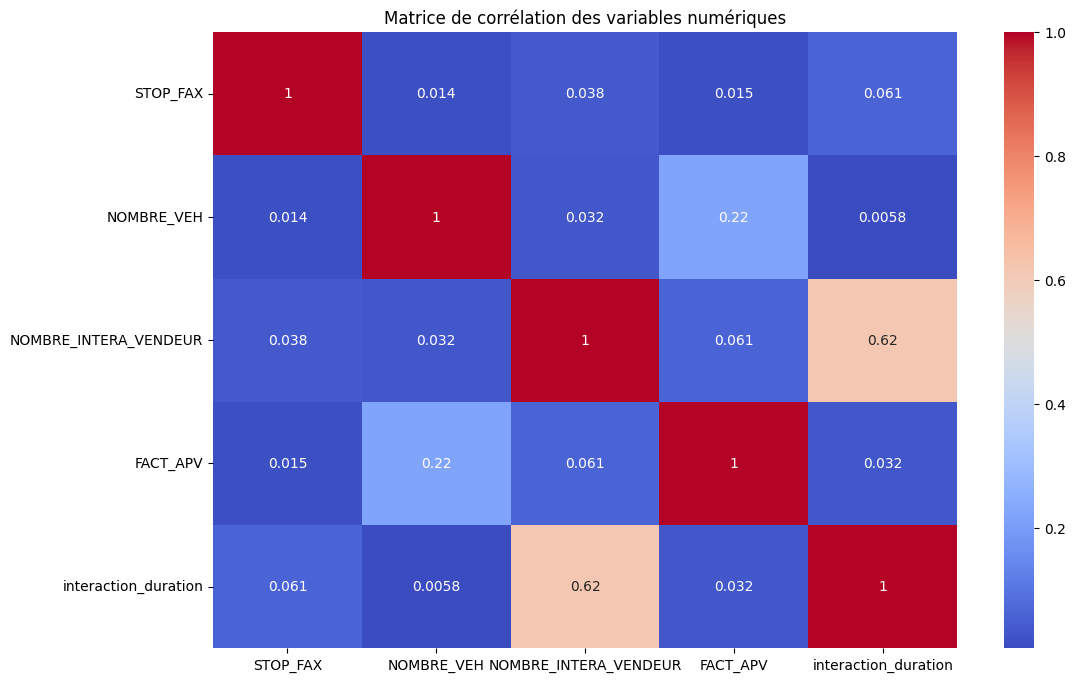

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
# df = pd.read_csv('votre_fichier.csv')

# Liste des variables numériques
numerical_vars = ['STOP_FAX', 'NOMBRE_VEH', 'NOMBRE_INTERA_VENDEUR', 'FACT_APV',
                  'interaction_duration']

# Calcul de la matrice de corrélation pour les variables numériques
corr_matrix = df[numerical_vars].corr(method='pearson')

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation des variables numériques')
plt.show()

 


In [24]:
df.to_sql('tab_classi', conn, if_exists='replace', index=False)
 

1178242

In [25]:
df_1= pd.read_sql('SELECT * FROM tab_classi', conn)


In [32]:
import pandas as pd

# Supposons que df_1 est votre DataFrame
# Compter les occurrences de "INCONNU" dans la colonne PROFESSION
nombre_inconnu = df_1['PROFESSION'].value_counts().get('INCONNU', 0)

print(f"Nombre de valeurs 'INCONNU' dans la colonne PROFESSION : {nombre_inconnu}")

Nombre de valeurs 'INCONNU' dans la colonne PROFESSION : 1166956


In [33]:
df_1

,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,Resultat_final,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,Negative,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0,0.0,0.0,0.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0,0.0,0.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1.0,INCONNU,I,1,SUZ,VN,5.0,...,Negative,"VN, VO","Concession, TÚlÚphone",RARE_CATEGORY,2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0,2.0,0.0,4.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,Marketing constructeur,2019-11-05 16:43:52,2019-11-05 16:43:52,0.0,0.0,0.0,2.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0.0,INCONNU,I,2,CIT,VN,1.0,...,Neutre,VN,TÚlÚphone,"Contact spontanÚ, Initiatives personnelles, Ma...",2020-12-07 11:58:37,2023-01-26 09:19:46,779.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0.0,INCONNU,S,0,Inconnue,Inconnue,0.0,...,Positive,VN,Concession,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,0.0,0.0,0.0,0.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,Positive,VO,Concession,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,0.0,0.0,0.0,0.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,Positive,VN,Concession,Initiatives personnelles,2024-10-22 19:06:34,2024-10-22 19:06:34,0.0,0.0,0.0,0.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0.0,INCONNU,I,2,Inconnue,Inconnue,0.0,...,INCONNU,Inconnue,Inconnue,Inconnue,1700-01-01 00:00:00,1700-01-01 00:00:00,0.0,0.0,0.0,0.0


 'STOP_FAX', 'PROFESSION','FLAG_I_S','MARQUE', 'CANAL', 'NOMBRE_VEH','NOMBRE_INTERA_VENDEUR','INTERA_APV','Resultat_final', 'VN_VO_combined', 'CANAL_COM_combined','ORIGINE_combined', 'Nombre_RDV', 'Nombre_RDV_ESSAI','Nombre_RDV_ATELIER'

### AAAA

In [43]:
df

,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,Resultat_final,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,Negative,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0,0.0,0.0,0.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0,0.0,0.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1.0,INCONNU,I,1,SUZ,VN,5.0,...,Negative,"VN, VO","Concession, TÚlÚphone",RARE_CATEGORY,2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0,2.0,0.0,4.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,Marketing constructeur,2019-11-05 16:43:52,2019-11-05 16:43:52,0.0,0.0,0.0,2.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0.0,INCONNU,I,2,CIT,VN,1.0,...,Neutre,VN,TÚlÚphone,"Contact spontanÚ, Initiatives personnelles, Ma...",2020-12-07 11:58:37,2023-01-26 09:19:46,779.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0.0,INCONNU,S,0,Inconnue,Inconnue,0.0,...,Positive,VN,Concession,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,0.0,0.0,0.0,0.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,Positive,VO,Concession,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,0.0,0.0,0.0,0.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,Positive,VN,Concession,Initiatives personnelles,2024-10-22 19:06:34,2024-10-22 19:06:34,0.0,0.0,0.0,0.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0.0,INCONNU,I,2,Inconnue,Inconnue,0.0,...,INCONNU,Inconnue,Inconnue,Inconnue,1700-01-01 00:00:00,1700-01-01 00:00:00,0.0,0.0,0.0,0.0


C:\Users\ajebali\AppData\Local\Temp\ipykernel_31848\2943235528.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['SEXE'] = pd.to_numeric(df_selected['SEXE'], errors='coerce')
C:\Users\ajebali\AppData\Local\Temp\ipykernel_31848\2943235528.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['SEXE'], inplace=True)


Valeurs NaN dans 'SEXE': 130448
Valeurs manquantes après l'encodage :
NOMBRE_VEH               0
NOMBRE_INTERA_VENDEUR    0
FACT_APV                 0
SEXE                     0
interaction_duration     0
STOP_FAX                 0
dtype: int64
Présence de NaN dans X_scaled : False
Composante 1 : Variance expliquée = 28.67%
Composante 2 : Variance expliquée = 24.51%
Composante 3 : Variance expliquée = 16.69%
Composante 4 : Variance expliquée = 16.49%
Composante 5 : Variance expliquée = 7.52%
Composante 6 : Variance expliquée = 6.13%


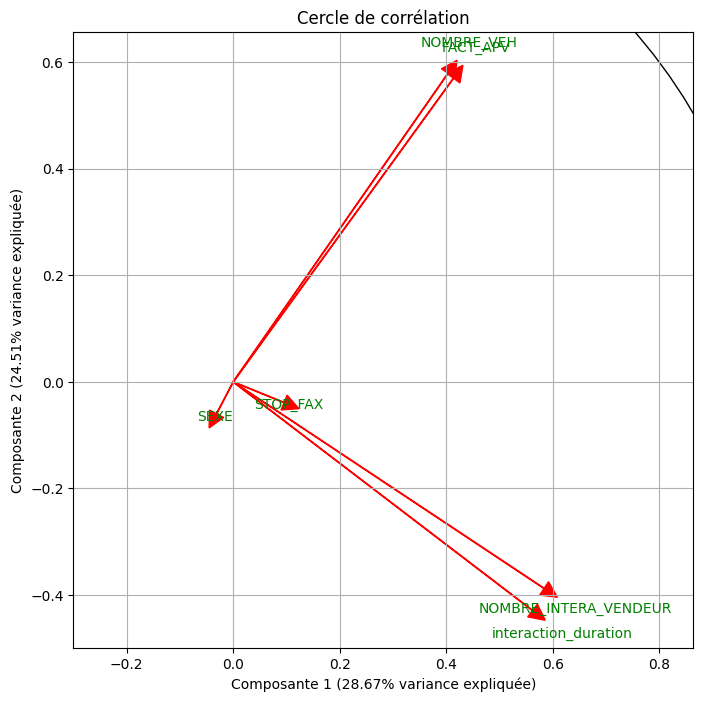

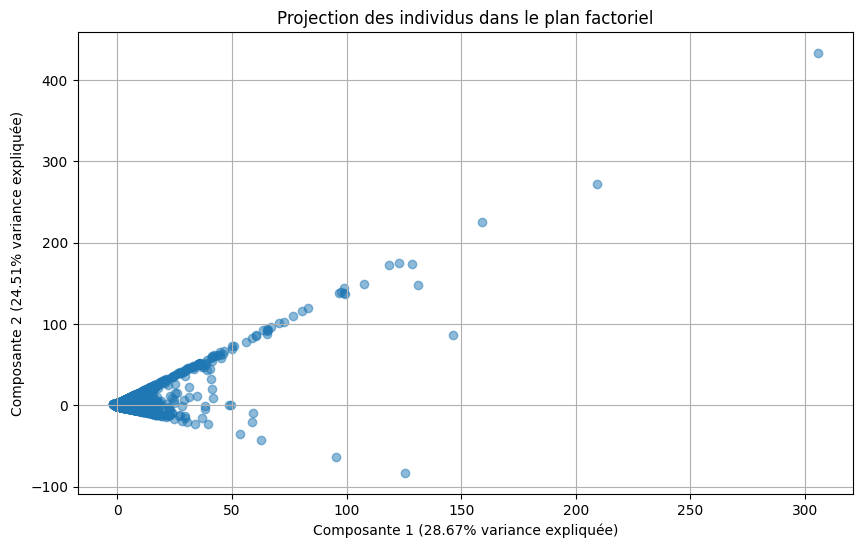

Coefficients des variables pour les deux premières composantes :
                       Composante 1  Composante 2
NOMBRE_VEH                 0.403190      0.579198
NOMBRE_INTERA_VENDEUR      0.583583     -0.387697
FACT_APV                   0.413540      0.570033
SEXE                      -0.031252     -0.059836
interaction_duration       0.561927     -0.429180
STOP_FAX                   0.095466     -0.038833


In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df
# df = pd.read_csv('votre_fichier.csv')  # Remplacez par le chargement réel de vos données

# 1. Sélection des variables
variables = [ 'NOMBRE_VEH', 'NOMBRE_INTERA_VENDEUR', 'FACT_APV','SEXE'
             ,'interaction_duration','STOP_FAX']

df_selected = df_1[variables]

# Convertir la colonne 'SEXE' en numérique, en traitant les erreurs
df_selected['SEXE'] = pd.to_numeric(df_selected['SEXE'], errors='coerce')

# Vérifier s'il y a des valeurs NaN après la conversion
print("Valeurs NaN dans 'SEXE':", df_selected['SEXE'].isnull().sum())

# Optionnel : Gérer les valeurs NaN si elles existent
df_selected.dropna(subset=['SEXE'], inplace=True) 

 

# Vérifier les valeurs manquantes après l'encodage
print("Valeurs manquantes après l'encodage :")
print(df_selected.isnull().sum())

# 4. Standardisation des données
X = df_selected.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérifier les valeurs manquantes dans X_scaled
print("Présence de NaN dans X_scaled :", np.isnan(X_scaled).any())

# 5. Réalisation de l'ACP
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

# Variance expliquée
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# Affichage de la variance expliquée
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1} : Variance expliquée = {var:.2f}%")

# Choix du nombre de composantes (par exemple, 2)
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pcs = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100

# 6. Visualisation des résultats

# Cercle de corrélation
plt.figure(figsize=(8,8))
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)
feature_names = variables

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(x*1.1, y*1.1, feature_names[i], color='green', ha='center', va='center')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'Composante 1 ({explained_variance[0]:.2f}% variance expliquée)')
plt.ylabel(f'Composante 2 ({explained_variance[1]:.2f}% variance expliquée)')
plt.title('Cercle de corrélation')
plt.grid()
plt.axis('equal')
plt.show()

# Projection des individus
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel(f'Composante 1 ({explained_variance[0]:.2f}% variance expliquée)')
plt.ylabel(f'Composante 2 ({explained_variance[1]:.2f}% variance expliquée)')
plt.title('Projection des individus dans le plan factoriel')
plt.grid()
plt.show()

# 7. Interprétation des résultats

# Coefficients des variables
loadings = pd.DataFrame(pcs.T, index=feature_names, columns=[f'Composante {i+1}' for i in range(n_components)])
print("Coefficients des variables pour les deux premières composantes :")
print(loadings)


In [91]:
df_1

,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_FAX,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,Resultat_final,VN_VO_combined,CANAL_COM_combined,ORIGINE_combined,min_DATE_CREA,max_DATE_MAJ,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,Negative,VN,TÚlÚphone,"Marketing constructeur, Initiatives personnell...",2018-11-14 18:02:55,2020-12-09 18:25:32,756.0,0.0,0.0,0.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,"Marketing affaire, Initiatives personnelles, C...",2020-10-13 17:03:02,2024-03-12 17:53:49,1246.0,0.0,0.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1.0,INCONNU,I,1,SUZ,VN,5.0,...,Negative,"VN, VO","Concession, TÚlÚphone",RARE_CATEGORY,2015-04-02 00:00:00,2024-03-09 16:43:00,3264.0,2.0,0.0,4.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,VN,TÚlÚphone,Marketing constructeur,2019-11-05 16:43:52,2019-11-05 16:43:52,0.0,0.0,0.0,2.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0.0,INCONNU,I,2,CIT,VN,1.0,...,Neutre,VN,TÚlÚphone,"Contact spontanÚ, Initiatives personnelles, Ma...",2020-12-07 11:58:37,2023-01-26 09:19:46,779.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0.0,INCONNU,S,0,Inconnue,Inconnue,0.0,...,Positive,VN,Concession,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,0.0,0.0,0.0,0.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,Positive,VO,Concession,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,0.0,0.0,0.0,0.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,Positive,VN,Concession,Initiatives personnelles,2024-10-22 19:06:34,2024-10-22 19:06:34,0.0,0.0,0.0,0.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0.0,INCONNU,I,2,Inconnue,Inconnue,0.0,...,INCONNU,Inconnue,Inconnue,Inconnue,1700-01-01 00:00:00,1700-01-01 00:00:00,0.0,0.0,0.0,0.0


### VEH-RPV

In [96]:
df_RPV.columns

Index(['ID_RAPPORT_VENDEUR', 'ID_INDIVIDU', 'ORIGINE', 'DATE_CREA', 'DATE_MAJ',
       'CANAL_COM', 'RESULTAT', 'VN_VO', 'Type_Interaction',
       'Delai_Entre_Interactions', 'Duree_MAJ'],
      dtype='object')

In [95]:
freq = df_RPV['ORIGINE'].value_counts() / len(df_RPV)
print(freq)

ORIGINE
Contact spontanÚ            0.369804
Initiatives personnelles    0.232456
Marketing affaire           0.230815
Suivi de commande           0.049064
InfomÚdiaire                0.042031
Indication                  0.037580
Marketing constructeur      0.012933
Entreprise                  0.010654
Marketing Financement       0.008042
Atelier                     0.006621
Name: count, dtype: float64


In [97]:
# Define the list of 'Marketing' origins
marketing_origins = ['Marketing affaire', 'Marketing constructeur', 'Marketing Financement']

# Create the 'Marketing' column
df_RPV['Marketing'] = df_RPV['ORIGINE'].isin(marketing_origins).astype(int)

# Create the 'Initiatives personnelles' column
df_RPV['Initiatives personnelles'] = (df_RPV['ORIGINE'] == 'Initiatives personnelles').astype(int)

# Create the 'Contact spontane' column
df_RPV['Contact spontane'] = (df_RPV['ORIGINE'] == 'Contact spontanÚ').astype(int)

# Create the 'autre' column for all other values
df_RPV['autre'] = (~df_RPV['ORIGINE'].isin(marketing_origins + ['Initiatives personnelles', 'Contact spontanÚ'])).astype(int)


In [98]:
df_RPV

,ID_RAPPORT_VENDEUR,ID_INDIVIDU,ORIGINE,DATE_CREA,DATE_MAJ,CANAL_COM,RESULTAT,VN_VO,Type_Interaction,Delai_Entre_Interactions,Duree_MAJ,Marketing,Initiatives personnelles,Contact spontane,autre
0,448332.0,1.0,Marketing constructeur,2018-11-14 18:02:55,2019-06-20 14:52:17,TÚlÚphone,Relance,VN,Positive,0.0,217,1,0,0,0
1,823224.0,1.0,Marketing constructeur,2019-06-20 14:52:17,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,217.0,362,1,0,0,0
2,833836.0,1.0,Marketing constructeur,2019-06-25 17:55:22,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,5.0,357,1,0,0,0
3,835967.0,1.0,Initiatives personnelles,2019-06-26 15:38:08,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,0.0,356,0,1,0,0
4,838417.0,1.0,Initiatives personnelles,2019-06-27 15:02:43,2020-06-17 11:28:18,TÚlÚphone,Relance,VN,Positive,0.0,355,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678052,4751169.0,1593690.0,Marketing constructeur,2024-10-22 18:59:01,2024-10-22 18:59:01,TÚlÚphone,Choc,VN,Negative,0.0,0,1,0,0,0
4678053,4751173.0,1593691.0,Contact spontanÚ,2024-10-22 18:59:25,2024-10-22 18:59:25,Concession,Relance,VN,Positive,0.0,0,0,0,1,0
4678054,4751180.0,1593693.0,Entreprise,2024-10-22 19:03:48,2024-10-22 19:03:48,Concession,Commande,VN,Positive,0.0,0,0,0,0,1
4678055,4751186.0,1593694.0,Contact spontanÚ,2024-10-22 19:06:11,2024-10-22 19:06:11,Concession,Relance,VO,Positive,0.0,0,0,0,1,0


In [81]:
df_vehicule

,ID_VEHICULE,ID_INDIVIDU,ID_VENTE,MARQUE,ETAT,D_CDE,D_LIVR,CANAL
0,1.0,51779.0,1.0,CIT,A,2010-06-04 00:00:00,2010-07-06 00:00:00,VN
1,2.0,712899.0,2.0,CIT,I,2010-08-30 00:00:00,2010-08-31 00:00:00,VN
2,3.0,712899.0,3.0,CIT,A,2010-09-27 00:00:00,2010-12-03 00:00:00,VN
3,4.0,712899.0,4.0,CIT,A,2010-09-17 00:00:00,2010-11-03 00:00:00,VN
4,5.0,712899.0,5.0,CIT,A,2010-09-03 00:00:00,2010-09-15 00:00:00,VN
...,...,...,...,...,...,...,...,...
1207134,1056154.0,545634.0,1607201.0,CIT,A,2023-10-18 00:00:00,2023-10-18 00:00:00,APV
1207135,1137185.0,1589663.0,1607202.0,CIT,A,2010-09-10 00:00:00,2010-09-10 00:00:00,APV
1207136,1134590.0,987260.0,1607203.0,CIT,I,2024-09-19 00:00:00,2024-09-19 00:00:00,APV
1207137,1137186.0,134442.0,1607204.0,PEU,A,2014-11-10 00:00:00,2014-11-10 00:00:00,APV


In [82]:
df_2 = df_1.rename(columns={'STOP_FAX': 'STOP_CONTACT'})


In [94]:
freq = df_1['ORIGINE_combined'].value_counts() / len(df)
print(freq)



ORIGINE_combined
Inconnue                                                                                                    0.461595
Marketing affaire                                                                                           0.092599
Contact spontanÚ                                                                                            0.077777
Contact spontanÚ, Initiatives personnelles                                                                  0.034545
Initiatives personnelles                                                                                    0.030653
                                                                                                              ...   
Contact spontanÚ, Suivi de commande, Initiatives personnelles, Marketing affaire, Marketing constructeur    0.000086
Indication, Suivi de commande, Contact spontanÚ, Initiatives personnelles, Marketing affaire                0.000085
Marketing affaire, Initiatives personnelles, At

STOP_CONTACT,SEXE,NOMBRE_VEH,Resultat_final	,CANAL_COM_combined,ORIGINE_combined,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER,FACT_APV,NOMBRE_INTERA_VENDEUR

In [90]:
df_2.dtypes

ID_INDIVIDU              float64
DATE_CREA                 object
DATE_MAJ                  object
STOP_CONTACT             float64
PROFESSION                object
FLAG_I_S                  object
SEXE                      object
MARQUE                    object
CANAL                     object
NOMBRE_VEH               float64
NOMBRE_INTERA_VENDEUR    float64
Nombre_Interactions       object
FACT_APV                 float64
Resultat_final            object
VN_VO_combined            object
CANAL_COM_combined        object
ORIGINE_combined          object
min_DATE_CREA             object
max_DATE_MAJ              object
interaction_duration     float64
Nombre_RDV               float64
Nombre_RDV_ESSAI         float64
Nombre_RDV_ATELIER       float64
dtype: object

- Variables numériques: STOP_CONTACT,NOMBRE_VEH,Nombre_RDV,Nombre_RDV_ESSAI
Nombre_RDV_ATELIER,FACT_APV,NOMBRE_INTERA_VENDEUR
- Variables non numériques: SEXE,Resultat_final,CANAL_COM_combined ,ORIGINE_combined

In [102]:
# Step 1: Aggregate the new columns per 'ID_INDIVIDU'

# Assuming 'df' is your original DataFrame with the new columns added
aggregated_df = df_RPV.groupby('ID_INDIVIDU')[['Marketing', 'Initiatives personnelles', 'Contact spontane', 'autre']].max().reset_index()

# Step 2: Merge the aggregated DataFrame with 'df_2' on 'ID_INDIVIDU'

# Assuming 'df_2' is your DataFrame with all the info about an individual
df_f = df_2.merge(aggregated_df, on='ID_INDIVIDU', how='left')


In [107]:
df1.columns

Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_CONTACT', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH',
       'NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'FACT_APV',
       'Resultat_final', 'VN_VO_combined', 'CANAL_COM_combined',
       'interaction_duration', 'Nombre_RDV', 'Nombre_RDV_ESSAI',
       'Nombre_RDV_ATELIER', 'ORGN_MRKTNG', 'ORGN_INIT_PERSO', 'ORGN_SPNTN',
       'ORGN_AUTRE'],
      dtype='object')

In [ ]:
# Suppression des colonnes 'A' et 'C'
dff = df_f.drop(['ORIGINE_combined','min_DATE_CREA','max_DATE_MAJ'], axis=1)


In [106]:
df1 = dff.rename(columns={'Marketing': 'ORGN_MRKTNG', 'Initiatives personnelles': 'ORGN_INIT_PERSO', 'Contact spontane': 'ORGN_SPNTN','autre':'ORGN_AUTRE'})


In [110]:
# Réorganiser les colonnes dans l'ordre 'gamma', 'alpha', 'beta'
df = df1[['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_CONTACT', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH','ORGN_MRKTNG', 'ORGN_INIT_PERSO', 'ORGN_SPNTN',
       'ORGN_AUTRE','NOMBRE_INTERA_VENDEUR', 'Nombre_Interactions', 'FACT_APV',
       'Resultat_final', 'VN_VO_combined', 'CANAL_COM_combined',
       'interaction_duration', 'Nombre_RDV', 'Nombre_RDV_ESSAI',
       'Nombre_RDV_ATELIER']]

df


,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_CONTACT,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,NOMBRE_INTERA_VENDEUR,Nombre_Interactions,FACT_APV,Resultat_final,VN_VO_combined,CANAL_COM_combined,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,8.0,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0",0.0,Negative,VN,TÚlÚphone,756.0,0.0,0.0,0.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1.0,INCONNU,I,1,CIT,VN,1.0,...,4.0,"Positifs: 2.0, Neutres: 1.0, Négatifs: 1.0",3.0,Positive,VN,TÚlÚphone,1246.0,0.0,0.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1.0,INCONNU,I,1,SUZ,VN,5.0,...,29.0,RARE_CATEGORY,11.0,Negative,"VN, VO","Concession, TÚlÚphone",3264.0,2.0,0.0,4.0
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0.0,INCONNU,I,1,CIT,VN,1.0,...,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",10.0,Positive,VN,TÚlÚphone,0.0,0.0,0.0,2.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0.0,INCONNU,I,2,CIT,VN,1.0,...,6.0,"Positifs: 2.0, Neutres: 3.0, Négatifs: 1.0",3.0,Neutre,VN,TÚlÚphone,779.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0.0,INCONNU,S,0,Inconnue,Inconnue,0.0,...,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",0.0,Positive,VN,Concession,0.0,0.0,0.0,0.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",0.0,Positive,VO,Concession,0.0,0.0,0.0,0.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,1.0,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",0.0,Positive,VN,Concession,0.0,0.0,0.0,0.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0.0,INCONNU,I,2,Inconnue,Inconnue,0.0,...,0.0,INCONNU,0.0,INCONNU,Inconnue,Inconnue,0.0,0.0,0.0,0.0


In [111]:
df.to_sql('tab_classi', conn, if_exists='replace', index=False)


1178242

In [112]:
df_0= pd.read_sql('SELECT * FROM tab_classi', conn)


In [115]:
df_0.head(1)

,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_CONTACT,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,NOMBRE_INTERA_VENDEUR,Nombre_Interactions,FACT_APV,Resultat_final,VN_VO_combined,CANAL_COM_combined,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,8.0,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0",0.0,Negative,VN,TÚlÚphone,756.0,0.0,0.0,0.0


In [2]:
df_f.columns

Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_CONTACT', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH', 'ORGN_MRKTNG',
       'ORGN_INIT_PERSO', 'ORGN_SPNTN', 'ORGN_AUTRE', 'NOMBRE_INTERA_VENDEUR',
       'Nombre_Interactions', 'FACT_APV', 'Resultat_final', 'VN_VO_combined',
       'CANAL_COM_combined', 'interaction_duration', 'Nombre_RDV',
       'Nombre_RDV_ESSAI', 'Nombre_RDV_ATELIER'],
      dtype='object')

- Nombre_Interactions	
- VN_VO_combined
- CANAL_COM_combined
-> A faire comme pour ORIGINE_COMBINED : diviser les colonne pour une facilité en ACP 

In [3]:
df_f["VN_VO_combined"].unique()

array(['VN', 'VN, VO', 'Inconnue', 'VO', 'VO, VN', '0, VN', 'VN, 0',
       'VN, 0, VO', '0, VN, VO', 'RARE_CATEGORY', '0', '0, VO, VN',
       'VO, VN, 0', '0, VO'], dtype=object)

In [7]:
total_count = len(df_f['VN_VO_combined'])
rare_count = (df_f['VN_VO_combined'] == 'RARE_CATEGORY').sum()
rare_percentage = (rare_count / total_count) * 100

print(f"Pourcentage de 'RARE_CATEGORY': {rare_percentage:.2f}%")

Pourcentage de 'RARE_CATEGORY': 0.01%


In [5]:
df_RPV["CANAL_COM"].unique() 

array(['TÚlÚphone', 'Concession', 'mail', 'Agent', 'Internet', 'Domicile'],
      dtype=object)

In [6]:
df_f["CANAL_COM_combined"].unique()

array(['TÚlÚphone', 'Concession, TÚlÚphone', 'Concession, mail',
       'Concession', 'Inconnue', 'Concession, Agent, TÚlÚphone',
       'Concession, TÚlÚphone, Agent', 'Concession, TÚlÚphone, mail',
       'TÚlÚphone, Concession', 'TÚlÚphone, Agent, Concession',
       'Concession, Internet', 'TÚlÚphone, Internet', 'RARE_CATEGORY',
       'Concession, TÚlÚphone, Internet', 'TÚlÚphone, Concession, mail',
       'TÚlÚphone, Agent', 'Agent, TÚlÚphone',
       'Internet, Concession, TÚlÚphone', 'Domicile, TÚlÚphone', 'Agent',
       'Internet, Concession', 'Concession, mail, TÚlÚphone',
       'TÚlÚphone, Domicile', 'mail, TÚlÚphone',
       'Agent, Concession, TÚlÚphone', 'Agent, TÚlÚphone, Concession',
       'Concession, Domicile, TÚlÚphone', 'Concession, Agent',
       'mail, Concession, TÚlÚphone', 'mail',
       'TÚlÚphone, mail, Concession', 'TÚlÚphone, mail',
       'TÚlÚphone, Concession, Agent', 'Domicile, TÚlÚphone, Concession',
       'Domicile', 'Internet', 'mail, TÚlÚphone, 

In [ ]:
df = df_f.drop('VN_VO_encoded', axis=1)

In [23]:
df__= pd.read_sql('SELECT * FROM tab_classi', conn)


In [24]:
df__.columns

Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_CONTACT', 'PROFESSION',
       'FLAG_I_S', 'SEXE', 'MARQUE', 'CANAL', 'NOMBRE_VEH', 'ORGN_MRKTNG',
       'ORGN_INIT_PERSO', 'ORGN_SPNTN', 'ORGN_AUTRE', 'NOMBRE_INTERA_VENDEUR',
       'Nombre_Interactions', 'FACT_APV', 'Resultat_final', 'VN_VO_combined',
       'CANAL_COM_combined', 'interaction_duration', 'Nombre_RDV',
       'Nombre_RDV_ESSAI', 'Nombre_RDV_ATELIER'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

  

 
# Fonction de mappage ajustée pour conserver 'Inconnue'
def map_vn_vo(value):
    if value in ['VN', '0, VN', 'VN, 0']:
        return 'VN'
    elif value in ['VO', '0, VO']:
        return 'VO'
    elif value in [
        'VN, VO', 'VO, VN', 'VN, 0, VO',
        '0, VN, VO', '0, VO, VN', 'VO, VN, 0'
    ]:
        return 'VN,VO'
    elif value == '0':
        return '0'
    elif value == 'RARE_CATEGORY':
        return 'RARE_CATEGORY'
    else:
        return value  # Conserver 'Inconnue' telle quelle

# Appliquer le mappage
df__['VN_VO_mapped'] = df__['VN_VO_combined'].apply(map_vn_vo)

# Remplacer les valeurs '0' par 'Zero' pour une gestion cohérente
df__['VN_VO_mapped_str'] = df__['VN_VO_mapped'].astype(str).replace('0', 'Zero')

# Identifier la catégorie la plus fréquente (mode) excluant 'RARE_CATEGORY'
mode_category = df__.loc[df__['VN_VO_mapped'] != 'RARE_CATEGORY', 'VN_VO_mapped'].mode()[0]

# Remplacer 'RARE_CATEGORY' par la catégorie la plus fréquente
df__['VN_VO_mapped'] = df__['VN_VO_mapped'].replace('RARE_CATEGORY', mode_category)

# Mettre à jour 'VN_VO_mapped_str' après remplacement
df__['VN_VO_mapped_str'] = df__['VN_VO_mapped'].astype(str).replace('0', 'Zero')

# Initialiser le LabelEncoder
le = LabelEncoder()

# Ajuster le LabelEncoder sur toutes les catégories présentes
le.fit(df__['VN_VO_mapped_str'])

# Encoder les catégories
df__['VN_VO_encoded'] = le.transform(df__['VN_VO_mapped_str'])

# Supprimer les colonnes intermédiaires si nécessaire
df_f_final = df__.drop(['VN_VO_combined', 'VN_VO_mapped', 'VN_VO_mapped_str'], axis=1)

# Afficher le DataFrame final
print(df_f_final)


In [31]:
# Calculer les pourcentages de chaque catégorie
pourcentages = df_f_final["CANAL_COM_combined"].value_counts(normalize=True) * 100

# Afficher les pourcentages avec un arrondi à deux décimales
pourcentages = pourcentages.round(2)
print("Pourcentage de chaque catégorie dans 'CANAL_COM_combined' :")
print(pourcentages)


Pourcentage de chaque catégorie dans 'CANAL_COM_combined' :
CANAL_COM_combined
Inconnue                           46.16
TÚlÚphone                          19.99
Concession, TÚlÚphone              13.76
Concession                         11.38
TÚlÚphone, Concession               3.38
Agent, TÚlÚphone                    0.73
Agent                               0.51
Internet                            0.33
Concession, TÚlÚphone, mail         0.30
RARE_CATEGORY                       0.29
mail                                0.26
Internet, TÚlÚphone                 0.20
mail, TÚlÚphone                     0.19
Concession, Agent, TÚlÚphone        0.19
TÚlÚphone, Agent                    0.16
TÚlÚphone, mail                     0.16
Concession, mail, TÚlÚphone         0.15
Concession, TÚlÚphone, Agent        0.14
Domicile                            0.13
Concession, Agent                   0.11
Domicile, TÚlÚphone                 0.10
Agent, TÚlÚphone, Concession        0.10
Concession, mail   

In [32]:
df_RPV["CANAL_COM"].unique()

array(['TÚlÚphone', 'Concession', 'mail', 'Agent', 'Internet', 'Domicile'],
      dtype=object)

In [33]:
# Calculer le mode de CANAL_COM pour chaque ID_INDIVIDU
canal_mode = df_RPV.groupby('ID_INDIVIDU')['CANAL_COM'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Convertir le résultat en DataFrame
canal_mode = canal_mode.reset_index().rename(columns={'CANAL_COM': 'CANAL_COM_Mode'})
print("\nCanal de Communication le Plus Utilisé par Individu (Approche 1) :")
print(canal_mode)



Canal de Communication le Plus Utilisé par Individu (Approche 1) :
        ID_INDIVIDU CANAL_COM_Mode
0               1.0      TÚlÚphone
1               2.0      TÚlÚphone
2               3.0     Concession
3               4.0      TÚlÚphone
4               5.0      TÚlÚphone
...             ...            ...
635663    1593690.0      TÚlÚphone
635664    1593691.0     Concession
635665    1593693.0     Concession
635666    1593694.0     Concession
635667    1593695.0     Concession

[635668 rows x 2 columns]


In [34]:
# Fusionner le mode avec le DataFrame original
df__1= pd.merge(df_f_final, canal_mode, on='ID_INDIVIDU', how='left')

df__1.head(10)


,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_CONTACT,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,Nombre_Interactions,FACT_APV,Resultat_final,CANAL_COM_combined,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER,VN_VO_encoded,CANAL_COM_Mode
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,"Positifs: 7.0, Neutres: 0.0, Négatifs: 1.0",0.0,Negative,TÚlÚphone,756.0,0.0,0.0,0.0,1,TÚlÚphone
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1.0,INCONNU,I,1,CIT,VN,1.0,...,"Positifs: 2.0, Neutres: 1.0, Négatifs: 1.0",3.0,Positive,TÚlÚphone,1246.0,0.0,0.0,1.0,1,TÚlÚphone
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1.0,INCONNU,I,1,SUZ,VN,5.0,...,RARE_CATEGORY,11.0,Negative,"Concession, TÚlÚphone",3264.0,2.0,0.0,4.0,2,Concession
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0.0,INCONNU,I,1,CIT,VN,1.0,...,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",10.0,Positive,TÚlÚphone,0.0,0.0,0.0,2.0,1,TÚlÚphone
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0.0,INCONNU,I,2,CIT,VN,1.0,...,"Positifs: 2.0, Neutres: 3.0, Négatifs: 1.0",3.0,Neutre,TÚlÚphone,779.0,0.0,0.0,0.0,1,TÚlÚphone
5,6.0,2015-03-31 00:45:15,2018-12-06 16:11:20,1.0,INCONNU,I,1,CIT,RARE_CATEGORY,2.0,...,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",13.0,Negative,"Concession, TÚlÚphone",2554.0,0.0,0.0,6.0,2,TÚlÚphone
6,8.0,2015-03-31 00:45:15,2020-09-29 17:45:54,1.0,INCONNU,I,0,CIT,VN,1.0,...,"Positifs: 6.0, Neutres: 0.0, Négatifs: 1.0",14.0,Negative,"Concession, mail",2432.0,0.0,0.0,5.0,1,mail
7,11.0,2015-03-31 00:45:15,2020-11-30 11:36:14,0.0,INCONNU,I,1,CIT,APV,2.0,...,"Positifs: 1.0, Neutres: 0.0, Négatifs: 1.0",4.0,Negative,TÚlÚphone,14.0,0.0,0.0,0.0,1,TÚlÚphone
8,12.0,2015-03-31 00:45:15,2015-06-04 17:26:42,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,"Positifs: 1.0, Neutres: 0.0, Négatifs: 0.0",0.0,Positive,Concession,149.0,0.0,0.0,0.0,1,Concession
9,13.0,2015-03-31 00:45:15,2018-11-27 13:43:15,0.0,INCONNU,I,1,CIT,APV,1.0,...,"Positifs: 4.0, Neutres: 0.0, Négatifs: 1.0",3.0,Negative,TÚlÚphone,1598.0,0.0,0.0,0.0,1,TÚlÚphone


In [43]:
df__1["CANAL_COM_Mode"].unique()

array(['TÚlÚphone', 'Concession', 'mail', nan, 'Agent', 'Internet',
       'Domicile'], dtype=object)

In [39]:
df


,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_CONTACT,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER,VN_VO_mapped,VN_VO_mapped_str,VN_VO_encoded,Positifs,Neutres,Négatifs
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,756.0,0.0,0.0,0.0,VN,VN,0.000000,7.0,0.0,1.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1.0,INCONNU,I,1,CIT,VN,1.0,...,1246.0,0.0,0.0,1.0,VN,VN,0.000000,2.0,1.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1.0,INCONNU,I,1,SUZ,VN,5.0,...,3264.0,2.0,0.0,4.0,"VN,VO","VN,VO",1.000000,NaN,NaN,NaN
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0.0,INCONNU,I,1,CIT,VN,1.0,...,0.0,0.0,0.0,2.0,VN,VN,0.000000,1.0,0.0,0.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0.0,INCONNU,I,2,CIT,VN,1.0,...,779.0,0.0,0.0,0.0,VN,VN,0.000000,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,1593693.0,2024-10-22 19:01:48,2024-10-22 19:02:37,0.0,INCONNU,S,0,Inconnue,Inconnue,0.0,...,0.0,0.0,0.0,0.0,VN,VN,0.000000,1.0,0.0,0.0
1178238,1593694.0,2024-10-22 19:05:00,2024-10-22 19:05:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,0.0,0.0,0.0,0.0,VO,VO,2.000000,1.0,0.0,0.0
1178239,1593695.0,2024-10-22 19:06:00,2024-10-22 19:06:00,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,0.0,0.0,0.0,0.0,VN,VN,0.000000,1.0,0.0,0.0
1178240,1593696.0,2024-10-22 20:04:45,2024-10-22 20:04:45,0.0,INCONNU,I,2,Inconnue,Inconnue,0.0,...,0.0,0.0,0.0,0.0,Other,Other,0.849043,NaN,NaN,NaN


In [40]:
df["Positifs"].unique()

array([ 7.,  2., nan,  1.,  4.,  6.,  3.,  0.,  5.,  8., 18., 15., 13.,
       11., 10.,  9., 17., 14., 28., 12., 16., 19., 25., 22., 21., 20.,
       24., 23., 27., 26.])

In [41]:
dfl = df.drop(['Positifs','Négatifs','Neutres'], axis=1)

In [47]:
import pandas as pd
import numpy as np

 
# Étape 1 : Identifier les entrées standard et les catégories spéciales
entrees_standard = dfl['Nombre_Interactions'][~dfl['Nombre_Interactions'].isin(['RARE_CATEGORY', 'INCONNU'])]

# Étape 2 : Calculer la catégorie la plus fréquente (mode) parmi les entrées standard
mode_sentiment = entrees_standard.mode()[0]
print("\nCatégorie la plus fréquente (Mode) parmi les entrées standard:")
print(mode_sentiment)

# Étape 3 : Remplacer 'RARE_CATEGORY' par la catégorie la plus fréquente
dfl['Nombre_Interactions'] = dfl['Nombre_Interactions'].replace('RARE_CATEGORY', mode_sentiment)

# Étape 4 : Définir une fonction pour extraire les sentiments ou attribuer 0 pour 'INCONNU'
def extraire_sentiments(valeur):
    if valeur == 'INCONNU':
        return pd.Series({'Positifs': 0.0, 'Neutres': 0.0, 'Négatifs': 0.0})
    else:
        # Définir le pattern pour extraire les valeurs
        pattern = r'Positifs:\s*(?P<Positifs>\d+\.?\d*),\s*Neutres:\s*(?P<Neutres>\d+\.?\d*),\s*Négatifs:\s*(?P<Négatifs>\d+\.?\d*)'
        match = pd.Series(valeur).str.extract(pattern)
        return match.astype(float).iloc[0]

# Étape 5 : Appliquer la fonction pour extraire les sentiments
df_f_final[['Positifs', 'Neutres', 'Négatifs']] = df_f_final['Nombre_Interactions'].apply(extraire_sentiments)

 

df_f_final.head(2)



Catégorie la plus fréquente (Mode) parmi les entrées standard:
Positifs: 0.0, Neutres: 1.0, Négatifs: 1.0


,ID_INDIVIDU,DATE_CREA,DATE_MAJ,STOP_CONTACT,PROFESSION,FLAG_I_S,SEXE,MARQUE,CANAL,NOMBRE_VEH,...,Resultat_final,CANAL_COM_combined,interaction_duration,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER,VN_VO_encoded,Positifs,Neutres,Négatifs
0,1.0,2015-03-31 00:45:15,2018-11-30 17:12:14,0.0,INCONNU,I,0,Inconnue,Inconnue,0.0,...,Negative,TÚlÚphone,756.0,0.0,0.0,0.0,1,7.0,0.0,1.0
1,2.0,2015-03-31 00:45:15,2016-11-10 17:27:46,1.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,TÚlÚphone,1246.0,0.0,0.0,1.0,1,2.0,1.0,1.0
2,3.0,2015-03-31 00:45:15,2024-04-10 11:51:50,1.0,INCONNU,I,1,SUZ,VN,5.0,...,Negative,"Concession, TÚlÚphone",3264.0,2.0,0.0,4.0,2,NaN,NaN,NaN
3,4.0,2015-03-31 00:45:15,2015-03-31 00:48:57,0.0,INCONNU,I,1,CIT,VN,1.0,...,Positive,TÚlÚphone,0.0,0.0,0.0,2.0,1,1.0,0.0,0.0
4,5.0,2015-03-31 00:45:15,2017-12-13 18:21:38,0.0,INCONNU,I,2,CIT,VN,1.0,...,Neutre,TÚlÚphone,779.0,0.0,0.0,0.0,1,2.0,3.0,1.0
5,6.0,2015-03-31 00:45:15,2018-12-06 16:11:20,1.0,INCONNU,I,1,CIT,RARE_CATEGORY,2.0,...,Negative,"Concession, TÚlÚphone",2554.0,0.0,0.0,6.0,2,4.0,0.0,1.0
6,8.0,2015-03-31 00:45:15,2020-09-29 17:45:54,1.0,INCONNU,I,0,CIT,VN,1.0,...,Negative,"Concession, mail",2432.0,0.0,0.0,5.0,1,6.0,0.0,1.0
7,11.0,2015-03-31 00:45:15,2020-11-30 11:36:14,0.0,INCONNU,I,1,CIT,APV,2.0,...,Negative,TÚlÚphone,14.0,0.0,0.0,0.0,1,1.0,0.0,1.0
8,12.0,2015-03-31 00:45:15,2015-06-04 17:26:42,0.0,INCONNU,I,1,Inconnue,Inconnue,0.0,...,Positive,Concession,149.0,0.0,0.0,0.0,1,1.0,0.0,0.0
9,13.0,2015-03-31 00:45:15,2018-11-27 13:43:15,0.0,INCONNU,I,1,CIT,APV,1.0,...,Negative,TÚlÚphone,1598.0,0.0,0.0,0.0,1,4.0,0.0,1.0


In [76]:
df_f_final = df_f_final.drop('CANAL_COM_combined', axis=1)

- Inconnu : 0
- VN :1
- VN,VO :2
- VO : 3
- 0 : 4


In [77]:
df_f_final.columns

Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_CONTACT', 'FLAG_I_S',
       'SEXE', 'CANAL', 'NOMBRE_VEH', 'ORGN_MRKTNG', 'ORGN_INIT_PERSO',
       'ORGN_SPNTN', 'ORGN_AUTRE', 'NOMBRE_INTERA_VENDEUR', 'FACT_APV',
       'Resultat_final', 'Nombre_RDV', 'Nombre_RDV_ESSAI',
       'Nombre_RDV_ATELIER', 'VN_VO_encoded', 'Positifs', 'Neutres',
       'Négatifs'],
      dtype='object')

In [ ]:
import pandas as pd



# Étape 1 : Calculer le mode de CANAL_COM pour chaque ID_INDIVIDU
canal_mode = df_RPV.groupby('ID_INDIVIDU')['CANAL_COM'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Convertir le résultat en DataFrame
canal_mode = canal_mode.reset_index().rename(columns={'CANAL_COM': 'CANAL_COM_Mode'})
print("\nCanal de Communication le Plus Utilisé par Individu (Mode) :")
print(canal_mode)

# Étape 2 : Définir le dictionnaire d'encodage
encodage_canal = {
    'Téléphone': 1,
    'Concession': 2,
    'mail': 3,
    'Agent': 4,
    'Internet': 5,
    'Domicile': 6
}

# Étape 3 : Appliquer l'encodage
canal_mode['CANAL_COM_Mode_Encoded'] = canal_mode['CANAL_COM_Mode'].map(encodage_canal)
print("\nCanal de Communication Encodé :")
print(canal_mode)

# Étape 4 : Joindre les informations encodées à df_f_final
df_f_final = df_f_final.merge(canal_mode[['ID_INDIVIDU', 'CANAL_COM_Mode_Encoded']], on='ID_INDIVIDU', how='left')
print("\nDataFrame df_f_final Après Jointure :")
print(df_f_final)

# Étape 5 : Remplacer les NaN par 0 (ou une autre valeur par défaut)
df_f_final['CANAL_COM_Mode_Encoded'] = df_f_final['CANAL_COM_Mode_Encoded'].fillna(0).astype(int)
print("\nDataFrame df_f_final Après Remplacement des NaN :")
print(df_f_final)


- 'Téléphone': 1,
- 'Concession': 2,
- 'mail': 3,
- 'Agent': 4,
- 'Internet': 5,
- 'Domicile': 6

In [80]:
df_f_final

Index(['ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_CONTACT', 'FLAG_I_S',
       'SEXE', 'CANAL', 'NOMBRE_VEH', 'ORGN_MRKTNG', 'ORGN_INIT_PERSO',
       'ORGN_SPNTN', 'ORGN_AUTRE', 'NOMBRE_INTERA_VENDEUR', 'FACT_APV',
       'Resultat_final', 'Nombre_RDV', 'Nombre_RDV_ESSAI',
       'Nombre_RDV_ATELIER', 'VN_VO_encoded', 'Positifs', 'Neutres',
       'Négatifs', 'CANAL_COM_Mode_Encoded'],
      dtype='object')

In [ ]:
# Liste des colonnes actuelles
colonnes_actuelles = df_f_final.columns.tolist()
print("\nColonnes Actuelles dans df_f_final:")
print(colonnes_actuelles)

# Définir l'ordre souhaité des colonnes
ordre_souhaite = [
    'ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ', 'STOP_CONTACT', 'FLAG_I_S',
    'SEXE', 'CANAL', 'ORGN_MRKTNG', 'ORGN_INIT_PERSO', 'ORGN_SPNTN',
    'ORGN_AUTRE', 'NOMBRE_INTERA_VENDEUR', 'CANAL_COM_Mode_Encoded',
    'Positifs', 'Neutres', 'Négatifs', 'NOMBRE_VEH', 'FACT_APV',
    'Resultat_final', 'Nombre_RDV', 'Nombre_RDV_ESSAI',
    'Nombre_RDV_ATELIER', 'VN_VO_encoded'
]

# Vérifier les colonnes manquantes
colonnes_manquantes = [col for col in ordre_souhaite if col not in colonnes_actuelles]
if colonnes_manquantes:
    print("\nAttention : Les colonnes suivantes sont manquantes dans df_f_final et ne seront pas incluses dans l'ordre souhaité :")
    print(colonnes_manquantes)

# Filtrer les colonnes qui existent réellement
ordre_final = [col for col in ordre_souhaite if col in colonnes_actuelles]

# Réorganiser les colonnes
df_f_final = df_f_final[ordre_final]

print("\nColonnes Réorganisées dans df_f_final:")
print(df_f_final.columns.tolist())

# Afficher le DataFrame réorganisé
print("\nDataFrame df_f_final Réorganisé:")
print(df_f_final)

In [98]:
df_f_final.dtypes

ID_INDIVIDU               float64
DATE_CREA                  object
DATE_MAJ                   object
STOP_CONTACT              float64
FLAG_I_S                   object
SEXE                       object
CANAL                      object
ORGN_MRKTNG               float64
ORGN_INIT_PERSO           float64
ORGN_SPNTN                float64
ORGN_AUTRE                float64
NOMBRE_INTERA_VENDEUR     float64
CANAL_COM_Mode_Encoded      int64
Positifs                  float64
Neutres                   float64
Négatifs                  float64
NOMBRE_VEH                float64
FACT_APV                  float64
Resultat_final             object
Nombre_RDV                float64
Nombre_RDV_ESSAI          float64
Nombre_RDV_ATELIER        float64
VN_VO_encoded               int64
dtype: object

In [91]:
# Liste des colonnes numériques à remplacer
colonnes_numeriques = ['Positifs', 'Neutres', 'Négatifs','ORGN_MRKTNG','ORGN_INIT_PERSO','ORGN_SPNTN','ORGN_AUTRE']

# Remplacer les NaN par 0 dans les colonnes numériques
df_f_final[colonnes_numeriques] = df_f_final[colonnes_numeriques].fillna(0)

print("\nRemplacement des NaN par 0 effectué dans les colonnes numériques.")



Remplacement des NaN par 0 effectué dans les colonnes numériques.


In [ ]:
df_f_final

In [94]:
df_f_final.to_sql('tab_classi', conn, if_exists='replace', index=False)


1178242

In [95]:
df_ff= pd.read_sql('SELECT * FROM tab_classi', conn)


In [103]:
df_corr

,STOP_CONTACT,ORGN_MRKTNG,ORGN_INIT_PERSO,ORGN_SPNTN,ORGN_AUTRE,NOMBRE_INTERA_VENDEUR,CANAL_COM_Mode_Encoded,Positifs,Neutres,Négatifs,NOMBRE_VEH,FACT_APV,Nombre_RDV,Nombre_RDV_ESSAI,Nombre_RDV_ATELIER,VN_VO_encoded,FLAG_I_S_Encoded
0,0.0,1.0,1.0,1.0,0.0,8.0,0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1.0,1.0,1.0,1.0,0.0,4.0,0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,1,0
2,1.0,1.0,1.0,1.0,0.0,29.0,2,0.0,0.0,0.0,5.0,11.0,2.0,0.0,4.0,2,0
3,0.0,1.0,0.0,0.0,0.0,1.0,0,1.0,0.0,0.0,1.0,10.0,0.0,0.0,2.0,1,0
4,0.0,1.0,1.0,1.0,0.0,6.0,0,2.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178237,0.0,0.0,0.0,0.0,1.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
1178238,0.0,0.0,0.0,1.0,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0
1178239,0.0,0.0,1.0,0.0,0.0,1.0,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1178240,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


Aperçu du DataFrame df_f_final:
   ID_INDIVIDU            DATE_CREA             DATE_MAJ  STOP_CONTACT  \
0          1.0  2015-03-31 00:45:15  2018-11-30 17:12:14           0.0   
1          2.0  2015-03-31 00:45:15  2016-11-10 17:27:46           1.0   
2          3.0  2015-03-31 00:45:15  2024-04-10 11:51:50           1.0   
3          4.0  2015-03-31 00:45:15  2015-03-31 00:48:57           0.0   
4          5.0  2015-03-31 00:45:15  2017-12-13 18:21:38           0.0   

     FLAG_I_S        SEXE     CANAL  ORGN_MRKTNG  ORGN_INIT_PERSO  ORGN_SPNTN  \
0  I           0           Inconnue          1.0              1.0         1.0   
1  I           1                 VN          1.0              1.0         1.0   
2  I           1                 VN          1.0              1.0         1.0   
3  I           1                 VN          1.0              0.0         0.0   
4  I           2                 VN          1.0              1.0         1.0   

   ...  Neutres  Négatifs  NOMBRE_VE

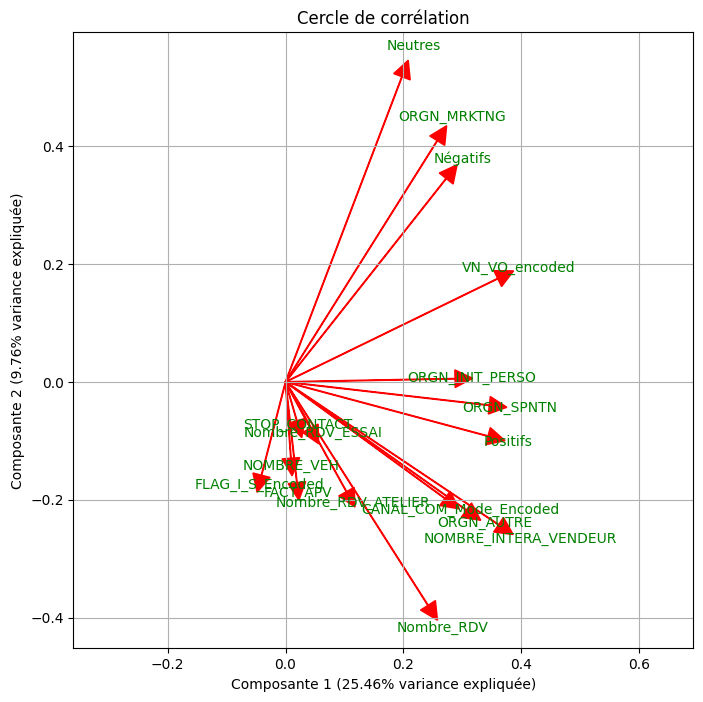

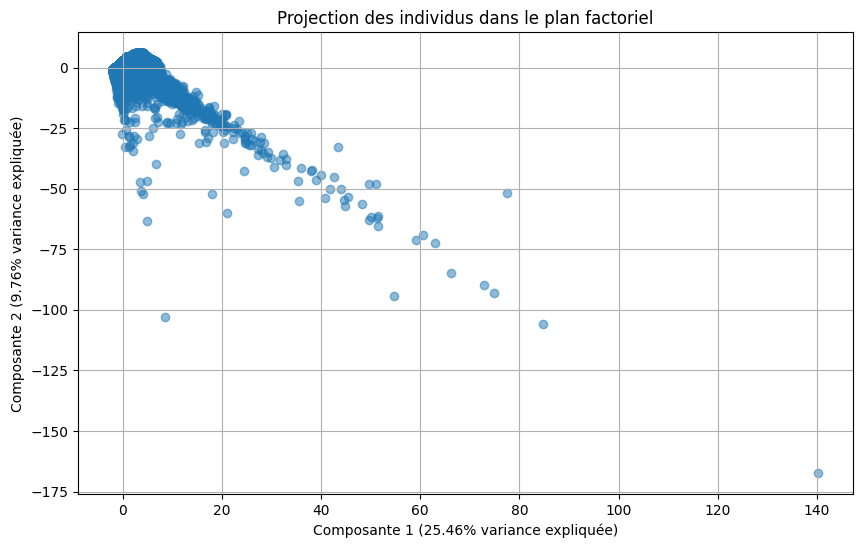


Coefficients des variables pour les deux premières composantes :
                        Composante 1  Composante 2
STOP_CONTACT                0.019160     -0.065854
ORGN_MRKTNG                 0.257331      0.409260
ORGN_INIT_PERSO             0.287453      0.005488
ORGN_SPNTN                  0.345658     -0.039595
ORGN_AUTRE                  0.306738     -0.217437
NOMBRE_INTERA_VENDEUR       0.361295     -0.242168
CANAL_COM_Mode_Encoded      0.270298     -0.197613
Positifs                    0.343388     -0.091927
Neutres                     0.197458      0.517723
Négatifs                    0.272490      0.345014
NOMBRE_VEH                  0.009029     -0.129428
FACT_APV                    0.019243     -0.170843
Nombre_RDV                  0.241624     -0.378945
Nombre_RDV_ESSAI            0.042035     -0.078564
Nombre_RDV_ATELIER          0.103296     -0.186084
VN_VO_encoded               0.359905      0.175253
FLAG_I_S_Encoded           -0.040795     -0.158186


In [100]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df_f_final et est déjà chargé
# Si ce n'est pas le cas, chargez-le avec pd.read_csv ou une autre méthode appropriée
# df_f_final = pd.read_csv('votre_fichier.csv')

print("Aperçu du DataFrame df_f_final:")
print(df_f_final.head())

print("\nTypes de données dans df_f_final:")
print(df_f_final.dtypes)

# 1. Encoder la colonne 'FLAG_I_S'
le_flag = LabelEncoder()
df_f_final['FLAG_I_S_Encoded'] = le_flag.fit_transform(df_f_final['FLAG_I_S'].astype(str))

print("\nEncodage de 'FLAG_I_S' :")
print(df_f_final[['FLAG_I_S', 'FLAG_I_S_Encoded']].head())

# 2. Sélection des variables pour l'ACP
variables_pca = [
    'STOP_CONTACT',
    'ORGN_MRKTNG',
    'ORGN_INIT_PERSO',
    'ORGN_SPNTN',
    'ORGN_AUTRE',
    'NOMBRE_INTERA_VENDEUR',
    'CANAL_COM_Mode_Encoded',
    'Positifs',
    'Neutres',
    'Négatifs',
    'NOMBRE_VEH',
    'FACT_APV',
    'Nombre_RDV',
    'Nombre_RDV_ESSAI',
    'Nombre_RDV_ATELIER',
    'VN_VO_encoded',
    'FLAG_I_S_Encoded'
]

# Vérifier que toutes les colonnes existent
missing_cols = [col for col in variables_pca if col not in df_f_final.columns]
if missing_cols:
    print("\nAttention : Les colonnes suivantes sont manquantes dans df_f_final et ne seront pas incluses dans l'ACP :")
    print(missing_cols)

# Filtrer les colonnes qui existent
variables_pca_present = [col for col in variables_pca if col in df_f_final.columns]

df_selected = df_f_final[variables_pca_present].copy()
print("\nAperçu des variables sélectionnées pour l'ACP:")
print(df_selected.head())

# 3. Gérer les valeurs manquantes
print("\nValeurs manquantes dans les variables sélectionnées avant traitement:")
print(df_selected.isnull().sum())

# Remplacer les NaN par 0
df_selected = df_selected.fillna(0)

print("\nValeurs manquantes dans les variables sélectionnées après remplacement:")
print(df_selected.isnull().sum())

# 4. Standardisation des données
X = df_selected.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nPrésence de NaN dans X_scaled :", np.isnan(X_scaled).any())

# 5. Réalisation de l'ACP

# a. Effectuer l'ACP complète pour analyser la variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained_variance_full = pca_full.explained_variance_ratio_ * 100
cumulative_variance_full = np.cumsum(explained_variance_full)

print("\nVariance expliquée par chaque composante (ACP complète) :")
for i, var in enumerate(explained_variance_full):
    print(f"Composante {i+1} : {var:.2f}%")

print("\nVariance cumulée (ACP complète) :")
for i, cum_var in enumerate(cumulative_variance_full):
    print(f"Composante {i+1} : {cum_var:.2f}%")

# b. Choisir le nombre de composantes (par exemple, 2)
n_components = 2
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)
pcs = pca.components_
explained_variance = pca.explained_variance_ratio_ * 100

print("\nVariance expliquée par les deux premières composantes :")
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1} : {var:.2f}%")

# 6. Visualisation des résultats

# a. Cercle de corrélation
plt.figure(figsize=(8,8))
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)
feature_names = df_selected.columns.tolist()

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, head_width=0.03, head_length=0.03, fc='red', ec='red')
    plt.text(x*1.1, y*1.1, feature_names[i], color='green', ha='center', va='center')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'Composante 1 ({explained_variance[0]:.2f}% variance expliquée)')
plt.ylabel(f'Composante 2 ({explained_variance[1]:.2f}% variance expliquée)')
plt.title('Cercle de corrélation')  # Correction de plt.tit à plt.title
plt.grid()
plt.axis('equal')
plt.show()

# b. Projection des individus
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

plt.figure(figsize=(10,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
plt.xlabel(f'Composante 1 ({explained_variance[0]:.2f}% variance expliquée)')
plt.ylabel(f'Composante 2 ({explained_variance[1]:.2f}% variance expliquée)')
plt.title('Projection des individus dans le plan factoriel')  # Correction de plt.tit à plt.title
plt.grid()
plt.show()

# 7. Interprétation des résultats

# Coefficients des variables
loadings = pd.DataFrame(pcs.T, index=feature_names, columns=[f'Composante {i+1}' for i in range(n_components)])
print("\nCoefficients des variables pour les deux premières composantes :")
print(loadings)



Matrice de Corrélation :
                        STOP_CONTACT  ORGN_MRKTNG  ORGN_INIT_PERSO  \
STOP_CONTACT                1.000000     0.008543         0.034281   
ORGN_MRKTNG                 0.008543     1.000000         0.264908   
ORGN_INIT_PERSO             0.034281     0.264908         1.000000   
ORGN_SPNTN                  0.007172     0.236670         0.324292   
ORGN_AUTRE                  0.019298     0.198935         0.243289   
NOMBRE_INTERA_VENDEUR       0.037538     0.379152         0.459380   
CANAL_COM_Mode_Encoded      0.019843     0.033469         0.260251   
Positifs                    0.046634     0.189248         0.428444   
Neutres                    -0.017164     0.624942         0.161260   
Négatifs                    0.003895     0.351831         0.300229   
NOMBRE_VEH                  0.013569     0.005076         0.000163   
FACT_APV                    0.014581     0.020292         0.011962   
Nombre_RDV                  0.025752     0.161695         0.1910

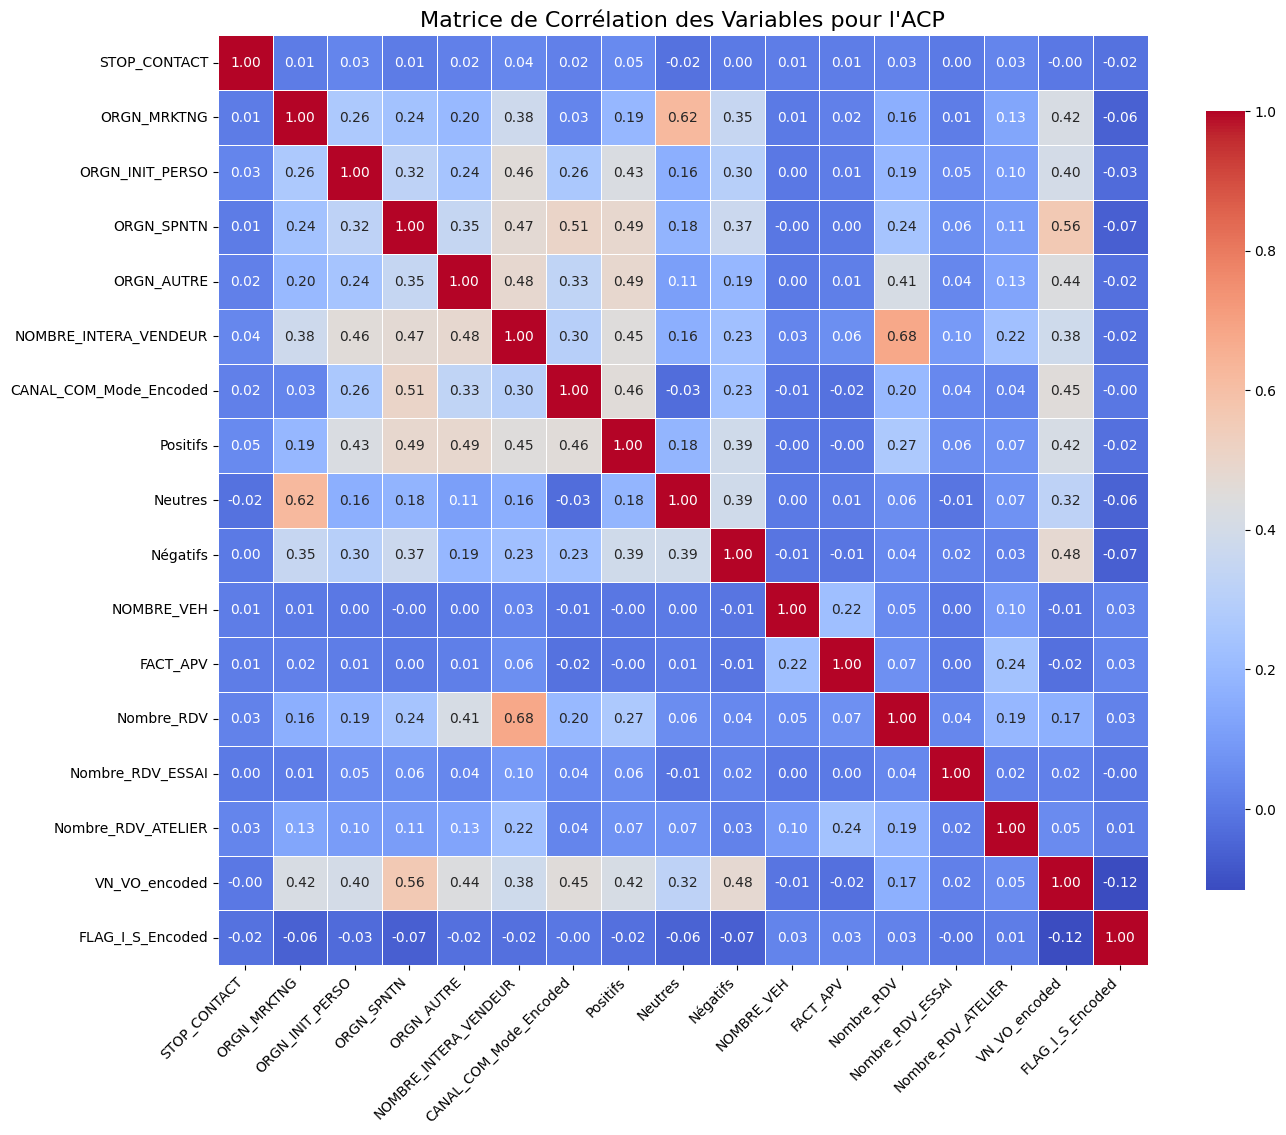

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df_f_final et est déjà chargé
# Si ce n'est pas le cas, chargez-le avec pd.read_csv ou une autre méthode appropriée
# Exemple :
# df_f_final = pd.read_csv('votre_fichier.csv')

# Liste des variables pour l'ACP
variables_pca = [
    'STOP_CONTACT',
    'ORGN_MRKTNG',
    'ORGN_INIT_PERSO',
    'ORGN_SPNTN',
    'ORGN_AUTRE',
    'NOMBRE_INTERA_VENDEUR',
    'CANAL_COM_Mode_Encoded',
    'Positifs',
    'Neutres',
    'Négatifs',
    'NOMBRE_VEH',
    'FACT_APV',
    'Nombre_RDV',
    'Nombre_RDV_ESSAI',
    'Nombre_RDV_ATELIER',
    'VN_VO_encoded',
    'FLAG_I_S_Encoded'
]

# Vérifier que toutes les colonnes existent dans le DataFrame
missing_cols = [col for col in variables_pca if col not in df_f_final.columns]
if missing_cols:
    print("\nAttention : Les colonnes suivantes sont manquantes dans df_f_final et ne seront pas incluses dans la matrice de corrélation :")
    print(missing_cols)

# Filtrer les colonnes qui existent
variables_pca_present = [col for col in variables_pca if col in df_f_final.columns]

# Sélectionner les variables pour la corrélation
df_corr = df_f_final[variables_pca_present]

# Calculer la matrice de corrélation
matrice_corr = df_corr.corr()

 

# Créer la heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    matrice_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .75}
)
plt.title('Matrice de Corrélation des Variables pour l\'ACP', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Aperçu du DataFrame df_f_final:
   ID_INDIVIDU            DATE_CREA             DATE_MAJ  STOP_CONTACT  \
0          1.0  2015-03-31 00:45:15  2018-11-30 17:12:14           0.0   
1          2.0  2015-03-31 00:45:15  2016-11-10 17:27:46           1.0   
2          3.0  2015-03-31 00:45:15  2024-04-10 11:51:50           1.0   
3          4.0  2015-03-31 00:45:15  2015-03-31 00:48:57           0.0   
4          5.0  2015-03-31 00:45:15  2017-12-13 18:21:38           0.0   

     FLAG_I_S        SEXE     CANAL  ORGN_MRKTNG  ORGN_INIT_PERSO  ORGN_SPNTN  \
0  I           0           Inconnue          1.0              1.0         1.0   
1  I           1                 VN          1.0              1.0         1.0   
2  I           1                 VN          1.0              1.0         1.0   
3  I           1                 VN          1.0              0.0         0.0   
4  I           2                 VN          1.0              1.0         1.0   

   ...  Négatifs  NOMBRE_VEH  FACT_A

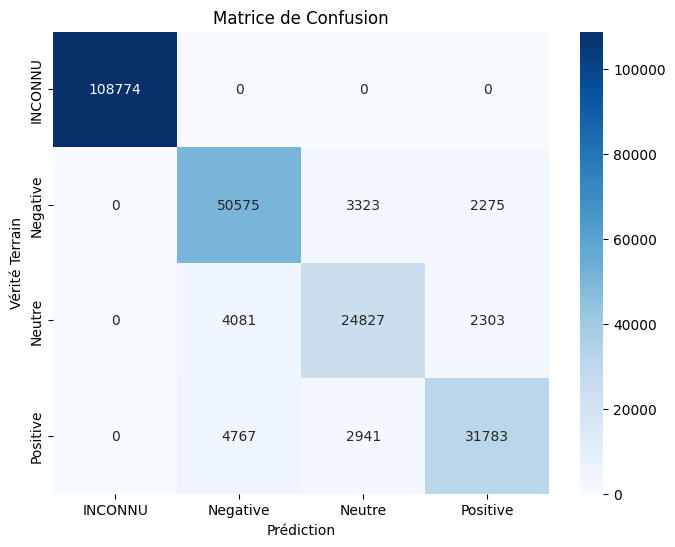

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [104]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que votre DataFrame s'appelle df_f_final et est déjà chargé
# Si ce n'est pas le cas, chargez-le avec pd.read_csv ou une autre méthode appropriée
# Exemple :
# df_f_final = pd.read_csv('votre_fichier.csv')

print("Aperçu du DataFrame df_f_final:")
print(df_f_final.head())

print("\nTypes de données dans df_f_final:")
print(df_f_final.dtypes)

# 1. Définir la variable cible et les variables prédictives
y = df_f_final['Resultat_final']
X = df_f_final.drop(['Resultat_final', 'ID_INDIVIDU', 'DATE_CREA', 'DATE_MAJ'], axis=1)

# 2. Encoder la variable cible
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nEncodage de 'Resultat_final' :")
print(pd.DataFrame({'Resultat_final': y, 'Resultat_final_Encoded': y_encoded}).head())

# 3. Encoder les variables catégorielles dans X
colonnes_categoriels = X.select_dtypes(include=['object']).columns.tolist()
print("\nColonnes catégorielles à encoder :")
print(colonnes_categoriels)

# Appliquer le One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=colonnes_categoriels, drop_first=True)
print("\nAperçu des variables après One-Hot Encoding :")
print(X_encoded.head())

# 4. Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTaille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")

# 5. Initialiser et entraîner le modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
print("\nModèle Random Forest entraîné.")

# 6. Faire des prédictions
y_pred = rf_classifier.predict(X_test)

# 7. Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle : {accuracy:.2f}")

print("\nRapport de Classification :")
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Vérité Terrain')
plt.title('Matrice de Confusion')
plt.show()

# 8. Optimiser les Hyperparamètres (Optionnel)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

print(f"\nMeilleur score de validation croisée : {grid_search.best_score_:.2f}")

# Utiliser le meilleur modèle pour faire des prédictions
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Évaluer le meilleur modèle
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nPrécision du meilleur modèle : {accuracy_best:.2f}")

print("\nRapport de Classification du meilleur modèle :")
print(classification_report(y_test, y_pred_best))

# Matrice de confusion du meilleur modèle
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Vérité Terrain')
plt.title('Matrice de Confusion du Meilleur Modèle')
plt.show()

# 9. Visualiser l'Importance des Variables
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_encoded.columns

plt.figure(figsize=(12,8))
sns.barplot(x=importances[indices], y=features[indices], palette='viridis')
plt.title('Importance des Variables dans le Meilleur Modèle Random Forest')
plt.xlabel('Importance')
plt.ylabel('Variables')
plt.show()
